In [1]:
import numpy as np
import pandas as pd
import scipy.integrate
import scipy
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches #used to write custom legends
from scipy.optimize import curve_fit
from scipy.integrate import odeint
from statistics import mean
from statistics import variance

## pIMT3-sfGFP T3 analysis

In [2]:
T3_data = [0,0.000000001,0.00000001,0.0000001,0.0000005,0.000001,0.000005,0.00001,0.0001,0.0002]
GFP_data = [0.006732534,-0.001414565,0.001432558,0.113770997,0.427908522,0.58563907,0.79882213,0.892496686,1.051068538,0.998942677]
GFP_error = [0.027288542,0.016011637,0.019567853,0.016781416,0.035808536,0.081000697,0.046788784,0.034799205,0.047964911,0.041370964]

In [3]:
def transfer_func(T3,alpha_GFP,delta_GFP,alpha_p,delta_p,beta,beta_primo):
    
    GFP_out=(delta_p*alpha_GFP+T3*(alpha_p*beta_primo+alpha_GFP*beta))/(delta_p*delta_GFP+beta*T3*delta_GFP)
    
    return GFP_out

fit, cov = curve_fit(transfer_func, T3_data, GFP_data, bounds=([0,0,0,0,0,0], 1 ))
alpha_GFP_fit=fit[0]
delta_GFP_fit=fit[1]
alpha_p_fit=fit[2]
delta_p_fit=fit[3]
beta_fit=fit[4]
beta_primo_fit=fit[5]
print(fit)

T3_fit = np.arange((10**-10), 0.001, 0.000000001);
GFP_fit = transfer_func(T3_fit, alpha_GFP_fit,delta_GFP_fit,alpha_p_fit,delta_p_fit,beta_fit,beta_primo_fit)

[5.64098602e-05 9.14010806e-01 9.43350553e-01 7.24737458e-07
 9.79118018e-01 9.43350553e-01]


In [4]:
ss_res=0
for i in range(0,10):
    ss_res=ss_res+(GFP_data[i] - transfer_func(T3_data[i], alpha_GFP_fit,delta_GFP_fit,alpha_p_fit,delta_p_fit,beta_fit,beta_primo_fit))**2
ss_tot = np.sum((GFP_data-np.mean(GFP_data))**2)
r_squared = 1 - (ss_res / ss_tot)
print('R-squared='+str(r_squared))

R-squared=0.9935538479516441


In [5]:
Amp=alpha_p_fit*beta_primo_fit/(delta_GFP_fit*beta_fit)
print('Amplitude:'+str(Amp))

GFP_min=alpha_GFP_fit/delta_GFP_fit
GFP_max=alpha_GFP_fit/delta_GFP_fit+alpha_p_fit*beta_primo_fit/(delta_GFP_fit*beta_fit)
print('GFP:'+str(GFP_min)+' to '+str(GFP_max))

GFP_f=(alpha_p_fit*beta_primo_fit+2*alpha_GFP_fit*beta_fit)/(2*delta_GFP_fit*beta_fit)
T4=delta_p_fit/beta_fit
Sens=alpha_p_fit*delta_p_fit*beta_primo_fit/(delta_GFP_fit*(delta_p_fit+T4*beta_fit)**2)*(T4/GFP_f)
print('Sensibility:'+str(Sens))

C_minus=10**(np.log10(delta_p_fit/beta_fit)-2/np.log(10))
C_plus=10**(np.log10(delta_p_fit/beta_fit)+4/np.log(10))
print('Dynamical:'+str(C_minus)+' to '+str(C_plus))


Amplitude:0.9943970882074942
GFP:6.171684170757457e-05 to 0.9944588050492017
Sensibility:0.4999379431189713
Dynamical:1.0017438895255644e-07 to 4.0413232874001794e-05


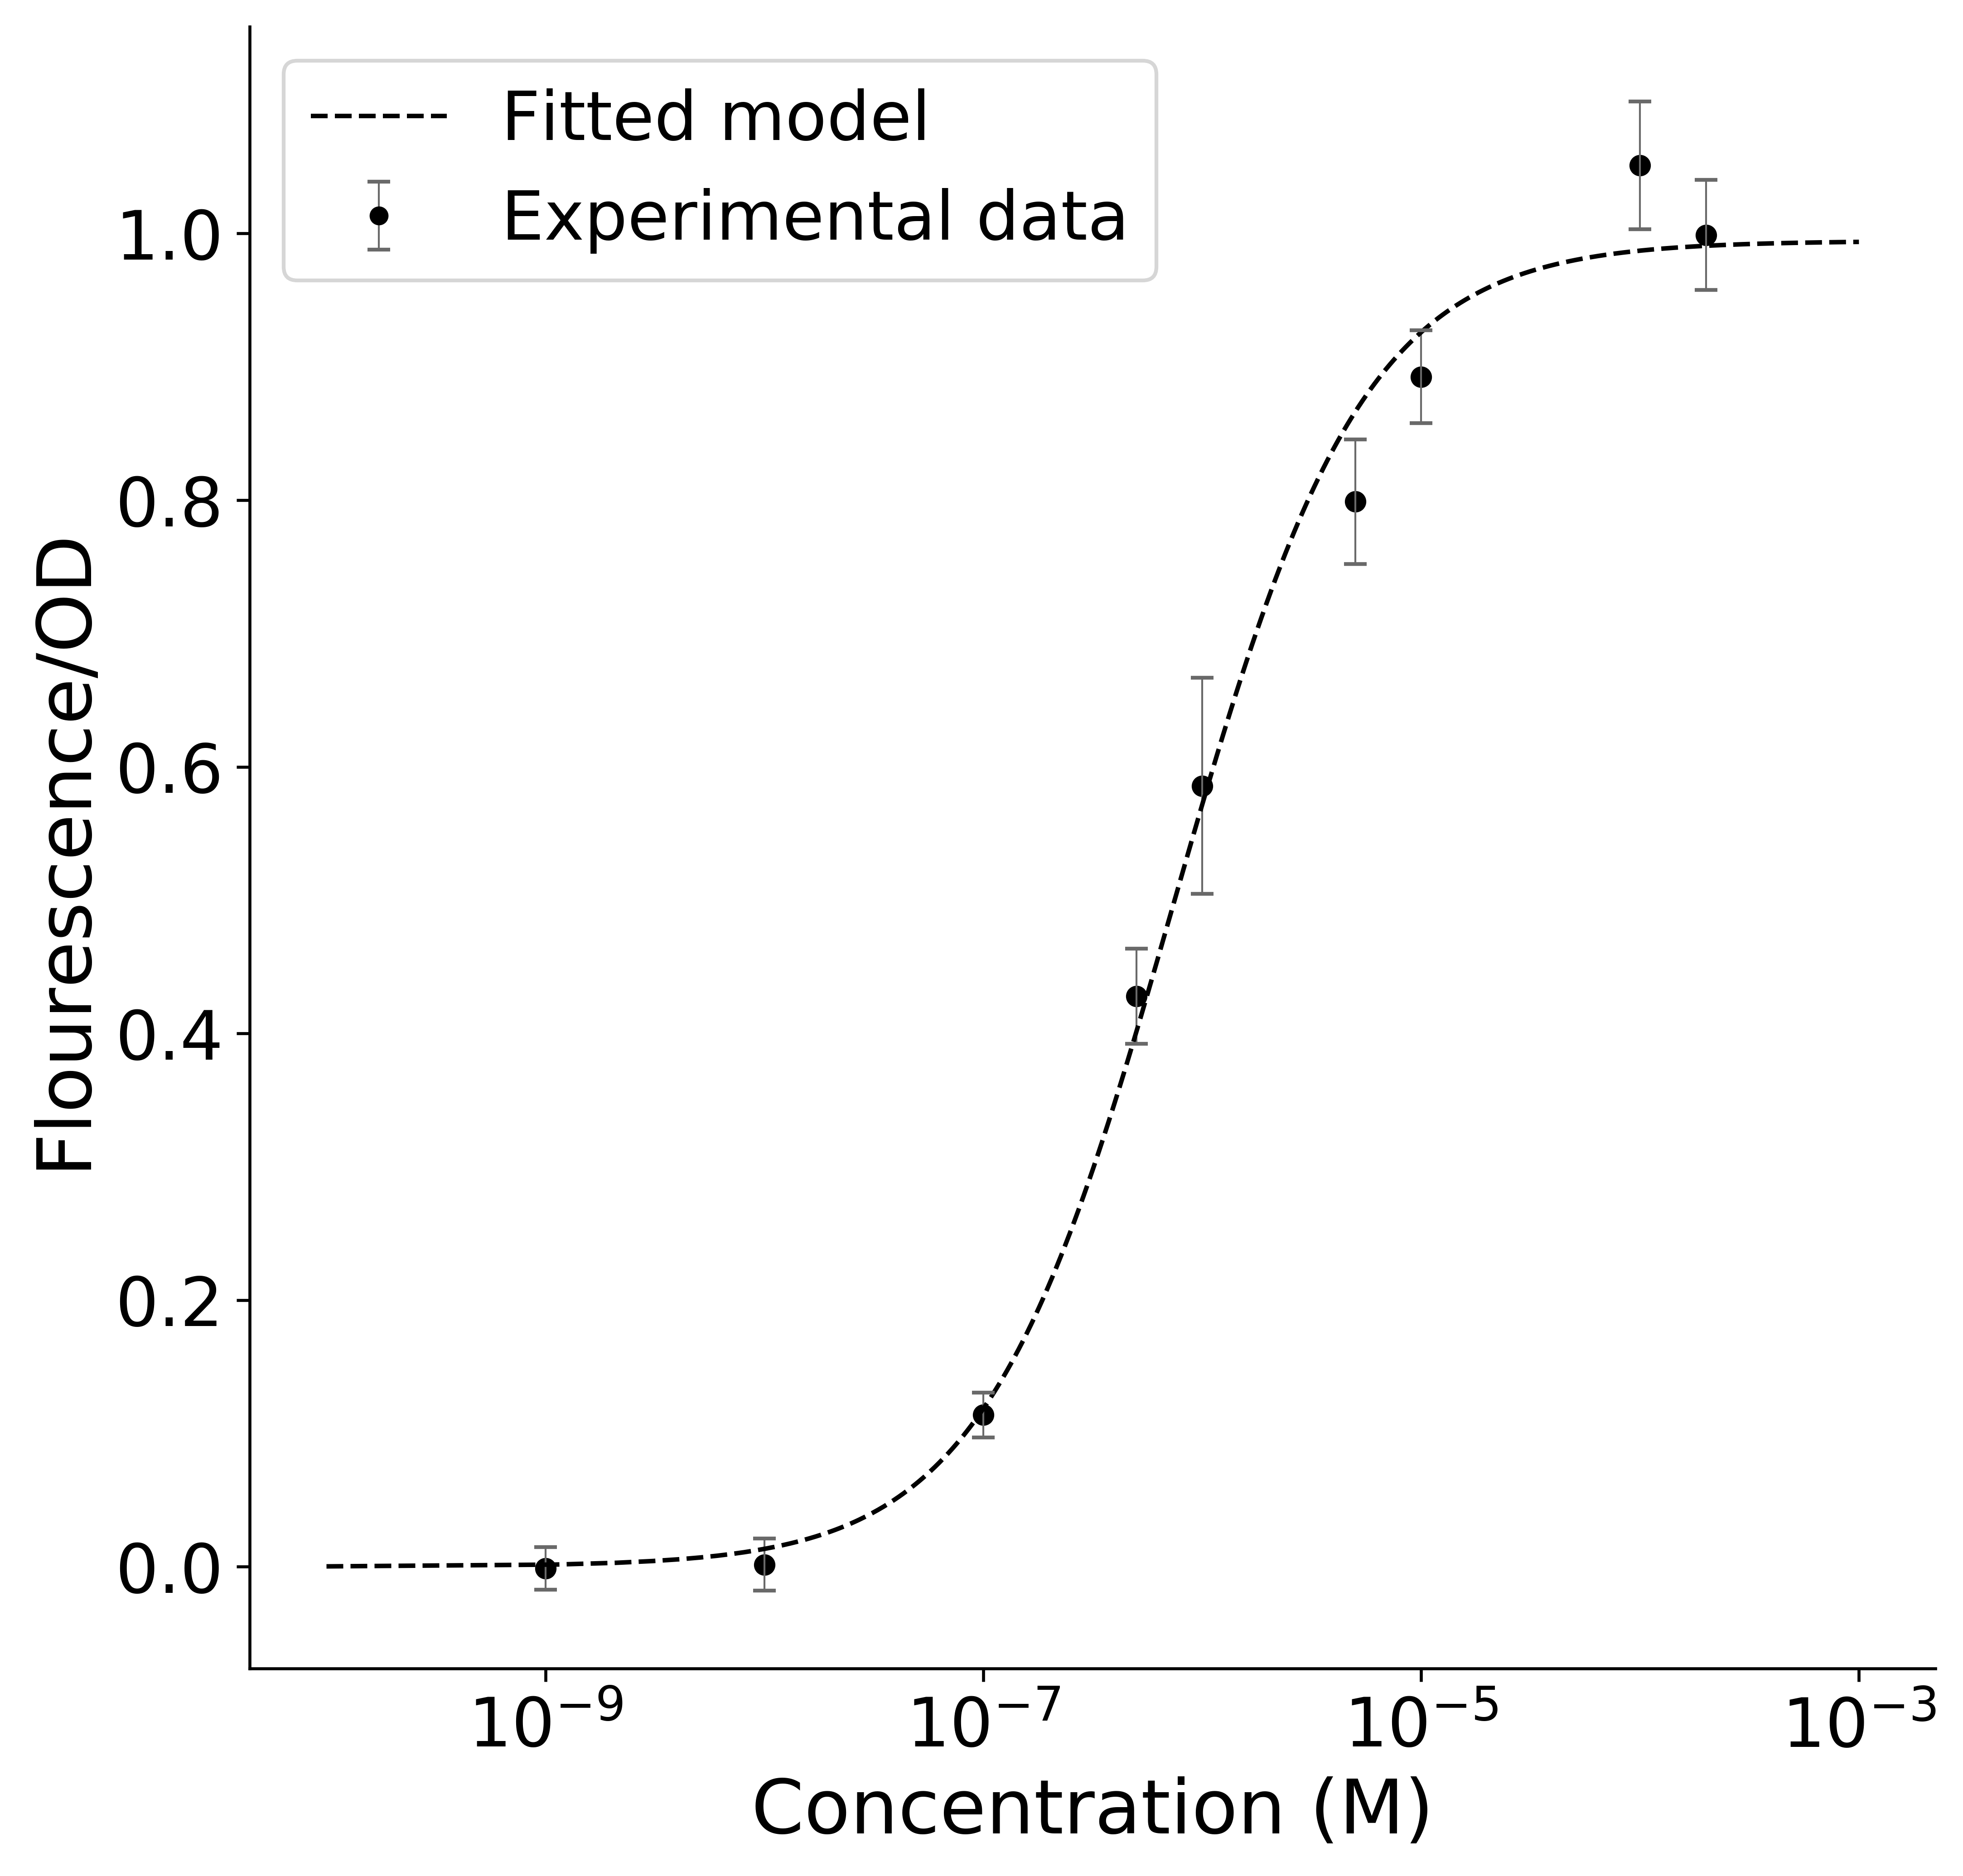

In [7]:
fig,ax=plt.subplots(1,1,figsize=(8, 8), dpi=600)
ax.scatter(T3_data,GFP_data, s=20, linewidth=1.2, color="Black",marker='o')
ax.plot(T3_fit, GFP_fit, linewidth=1.2, label='Fitted model',color="Black",linestyle='dashed')
plt.errorbar(T3_data,GFP_data, GFP_error, linewidth=1.2, fmt='o', markersize=4, color='black' , ecolor='dimgrey', elinewidth=0.5, capsize=3, barsabove=True, label='Experimental data')
plt.xscale('log')
plt.legend(loc='best',fontsize=20)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
plt.ylabel('Flourescence/OD', fontsize=20)
plt.xlabel('Concentration (M)', fontsize=20)
plt.legend(loc='best', fontsize=18)
plt.savefig('sfGFP_1LBD_T3', transparent=True)
plt.show()

In [7]:
GFP_SNR=[]
GFP=[100.0722605,106.1511873,127.6252399,130.3951258]
GFP_SNR.append(mean(GFP)**2/variance(GFP))
GFP=[104.2393157,110.5291606,112.1338326,130.7313083,111.3267331]
GFP_SNR.append(mean(GFP)**2/variance(GFP))
GFP=[97.36317602,108.2157404,131.0006582,110.6707653,109.7201421,137.9628025,107.1614673]
GFP_SNR.append(mean(GFP)**2/variance(GFP))
GFP=[141.0563289,156.6746866,155.3161309,129.9069394,129.5581573,150.7163976,157.8617923]
GFP_SNR.append(mean(GFP)**2/variance(GFP))
GFP=[244.2743068,250.0916255,192.6243976,240.868225,207.9419727,227.1983131,270.4800289]
GFP_SNR.append(mean(GFP)**2/variance(GFP))
GFP=[226.4239397,255.1529123,300.2274809,327.31749]
GFP_SNR.append(mean(GFP)**2/variance(GFP))
GFP=[342.9528393,350.0104008,279.0459787,315.4037014,323.1691882,360.3093628,385.6567126]
GFP_SNR.append(mean(GFP)**2/variance(GFP))
GFP=[376.053281,361.6490699,345.1506205,339.5957306,340.6095523,364.0704865,412.0312294]
GFP_SNR.append(mean(GFP)**2/variance(GFP))
GFP=[421.6577983,448.3536881,377.9935583,369.5216203,369.7162145,410.1911908,450.8502819]
GFP_SNR.append(mean(GFP)**2/variance(GFP))
GFP=[455.5303187,434.229764,368.3113336,375.7045424,370.4690386,357.0589963,364.2920023,413.4540017]
GFP_SNR.append(mean(GFP)**2/variance(GFP))
print(GFP_SNR)
print('SNR:'+str(mean(GFP_SNR)))

[58.30869880092157, 130.245971350654, 63.1615281501649, 139.1742281804605, 78.2242763912291, 37.773111633814324, 95.35791838293456, 200.13779478618565, 132.55833302941986, 112.76452838991852]
SNR:104.7706389095703


## pIMT3-sfGFP T4 analysis



In [8]:
T4_data = [0,(10**-9),(10**-8),(10**-7),5*(10**-7),(10**-6),5*(10**-6),(10**-5),(10**-4),2*(10**-4)]
GFP_data2 = [-0.00150654,-0.02948379,0.001920618,0.01565317,0.054751294,0.100066159,0.247691275,0.352110798,0.584027205,0.564952496]
GFP_error2 = [0.024370112,0.009474676,0.022733715,0.020652302,0.022788065,0.020717533,0.026630026,0.025292373,0.069775786,0.047166942]

In [9]:
fit, cov = curve_fit(transfer_func, T4_data, GFP_data2, bounds=([0,0,0,0,0,0], 1 ))
alpha_GFP_fit2=fit[0]
delta_GFP_fit2=fit[1]
alpha_p_fit2=fit[2]
delta_p_fit2=fit[3]
beta_fit2=fit[4]
beta_primo_fit2=fit[5]
print(fit)

T4_fit = np.arange((10**-10), 0.001, 0.00000001);
GFP_fit2 = transfer_func(T4_fit, alpha_GFP_fit2,delta_GFP_fit2,alpha_p_fit2,delta_p_fit2,beta_fit2,beta_primo_fit2)


[1.37440396e-05 9.12155391e-01 6.55931572e-01 5.24499146e-06
 7.86024965e-01 6.55931572e-01]


In [10]:
ss_res=0
for i in range(0,10):
    ss_res=ss_res+(GFP_data2[i] - transfer_func(T3_data[i], alpha_GFP_fit2,delta_GFP_fit2,alpha_p_fit2,delta_p_fit2,beta_fit2,beta_primo_fit2))**2
ss_tot = np.sum((GFP_data2-np.mean(GFP_data2))**2)
r_squared = 1 - (ss_res / ss_tot)
print('R-squared='+str(r_squared))

R-squared=0.9951699051720748


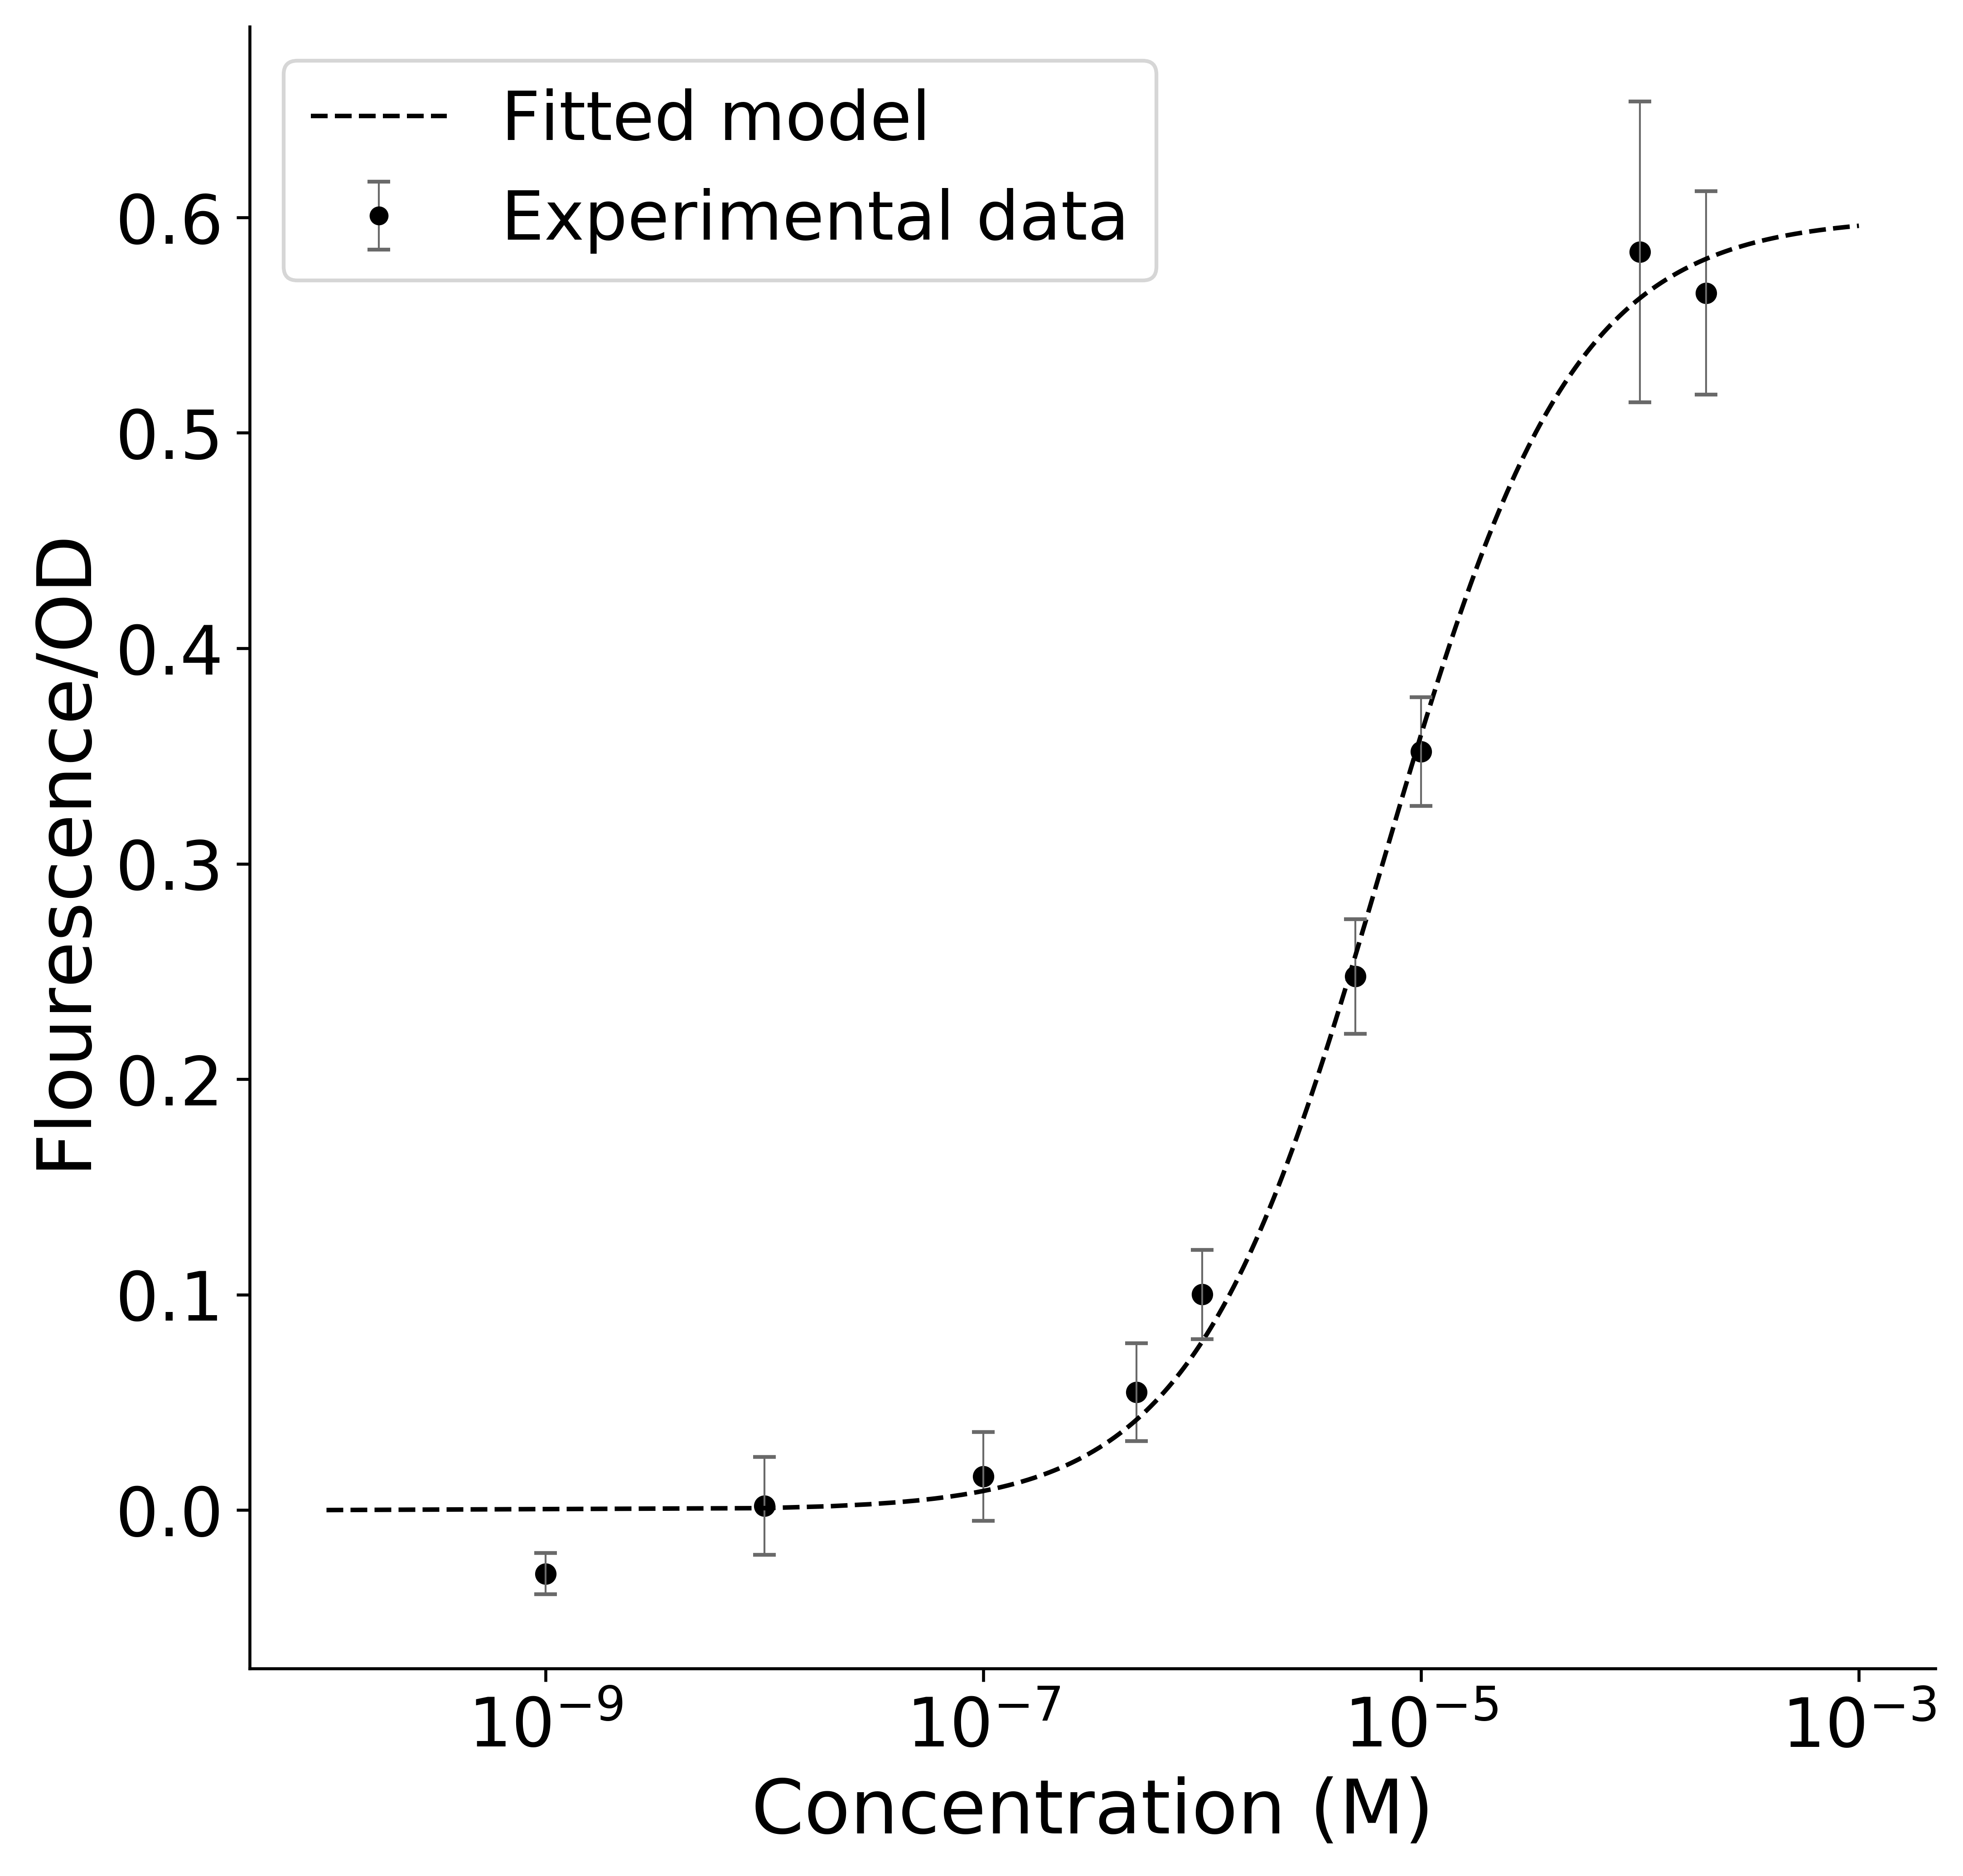

In [11]:
fig,ax=plt.subplots(1,1,figsize=(8, 8), dpi=600)
ax.scatter(T4_data,GFP_data2, s=20, linewidth=1.2, color="Black",marker='o')
ax.plot(T4_fit, GFP_fit2, linewidth=1.2, label='Fitted model',color="Black",linestyle='dashed')
plt.errorbar(T4_data,GFP_data2, GFP_error2, linewidth=1.2, fmt='o', markersize=4, color='black' , ecolor='dimgrey', elinewidth=0.5, capsize=3, barsabove=True, label='Experimental data')
plt.xscale('log')
plt.legend(loc='best',fontsize=20)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
plt.ylabel('Flourescence/OD', fontsize=20)
plt.xlabel('Concentration (M)', fontsize=20)
plt.legend( loc='best', fontsize=18)
plt.savefig('sfGFP_1LBD_T4', transparent=True)
plt.show()

In [12]:
Amp=alpha_p_fit2*beta_primo_fit2/(delta_GFP_fit2*beta_fit2)
print('Amplitude:'+str(Amp))

GFP_min=alpha_GFP_fit2/delta_GFP_fit2
GFP_max=alpha_GFP_fit2/delta_GFP_fit2+alpha_p_fit2*beta_primo_fit2/(delta_GFP_fit2*beta_fit2)
print('GFP:'+str(GFP_min)+' to '+str(GFP_max))

GFP_f2=(alpha_p_fit2*beta_primo_fit2+2*alpha_GFP_fit2*beta_fit2)/(2*delta_GFP_fit2*beta_fit2)
T3=delta_p_fit2/beta_fit2
Sens=alpha_p_fit2*delta_p_fit2*beta_primo_fit2/(delta_GFP_fit2*(delta_p_fit2+T3*beta_fit2)**2)*(T3/GFP_f2)
print('Sensibility:'+str(Sens))

C_minus=10**(np.log10(delta_p_fit2/beta_fit2)-2/np.log(10))
C_plus=10**(np.log10(delta_p_fit2/beta_fit2)+4/np.log(10))
print('Dynamical:'+str(C_minus)+' to '+str(C_plus))


Amplitude:0.6000837985754002
GFP:1.506765160575555e-05 to 0.6000988662270059
Sensibility:0.49997489201507395
Dynamical:9.030659794952064e-07 to 0.00036432281855208596


In [13]:
GFP_SNR=[]
GFP=[181.290019,168.440057,151.2465565,155.5447834]
GFP_SNR.append(mean(GFP)**2/variance(GFP))
GFP=[151.41304,153.9488495,150.6060963,151.7121794,155.4281244,156.0007796,157.8762677,173.726489]
GFP_SNR.append(mean(GFP)**2/variance(GFP))
GFP=[153.9266565,159.1500612,158.0060534,157.6021112,155.6896268,164.382393,163.3946594,208.526696]
GFP_SNR.append(mean(GFP)**2/variance(GFP))
GFP=[159.4327293,158.7162034,159.2426138,164.2737022,167.9837707,168.8140561,164.8328044,207.9773715]
GFP_SNR.append(mean(GFP)**2/variance(GFP))
GFP=[167.8055105,170.0816939,169.416933,176.1099197,178.7801457,176.8509364,176.2534716,223.0820359]
GFP_SNR.append(mean(GFP)**2/variance(GFP))
GFP=[180.4777695,186.3989188,189.7236743,185.3237677,188.7444338,188.2714678,188.2362806,232.162117]
GFP_SNR.append(mean(GFP)**2/variance(GFP))
GFP=[222.6664371,217.2078416,223.2122967,226.7842142,228.5690099,229.1709422,237.2315987,283.3926719]
GFP_SNR.append(mean(GFP)**2/variance(GFP))
GFP=[244.4152441,242.0955115,253.1026064,253.9948075,263.8754908,268.3037643,270.4472014,304.6384732]
GFP_SNR.append(mean(GFP)**2/variance(GFP))
GFP=[321.7979292,275.916891,290.5615445,301.3503222,310.4255493,317.6572236,347.3688214,452.4854453]
GFP_SNR.append(mean(GFP)**2/variance(GFP))
GFP=[288.5640082,273.4703496,289.3409211,302.7922345,316.8817434,341.2073579,375.864407,386.9458281]
GFP_SNR.append(mean(GFP)**2/variance(GFP))
print(GFP_SNR)
print('SNR:'+str(mean(GFP_SNR)))

[146.21251060312304, 438.83130566536005, 84.9894485361006, 107.81054373314193, 100.33317347370547, 139.02853444687497, 123.94574112705409, 173.75299157137073, 35.440255068501294, 58.38064598188717]
SNR:140.87251502071194


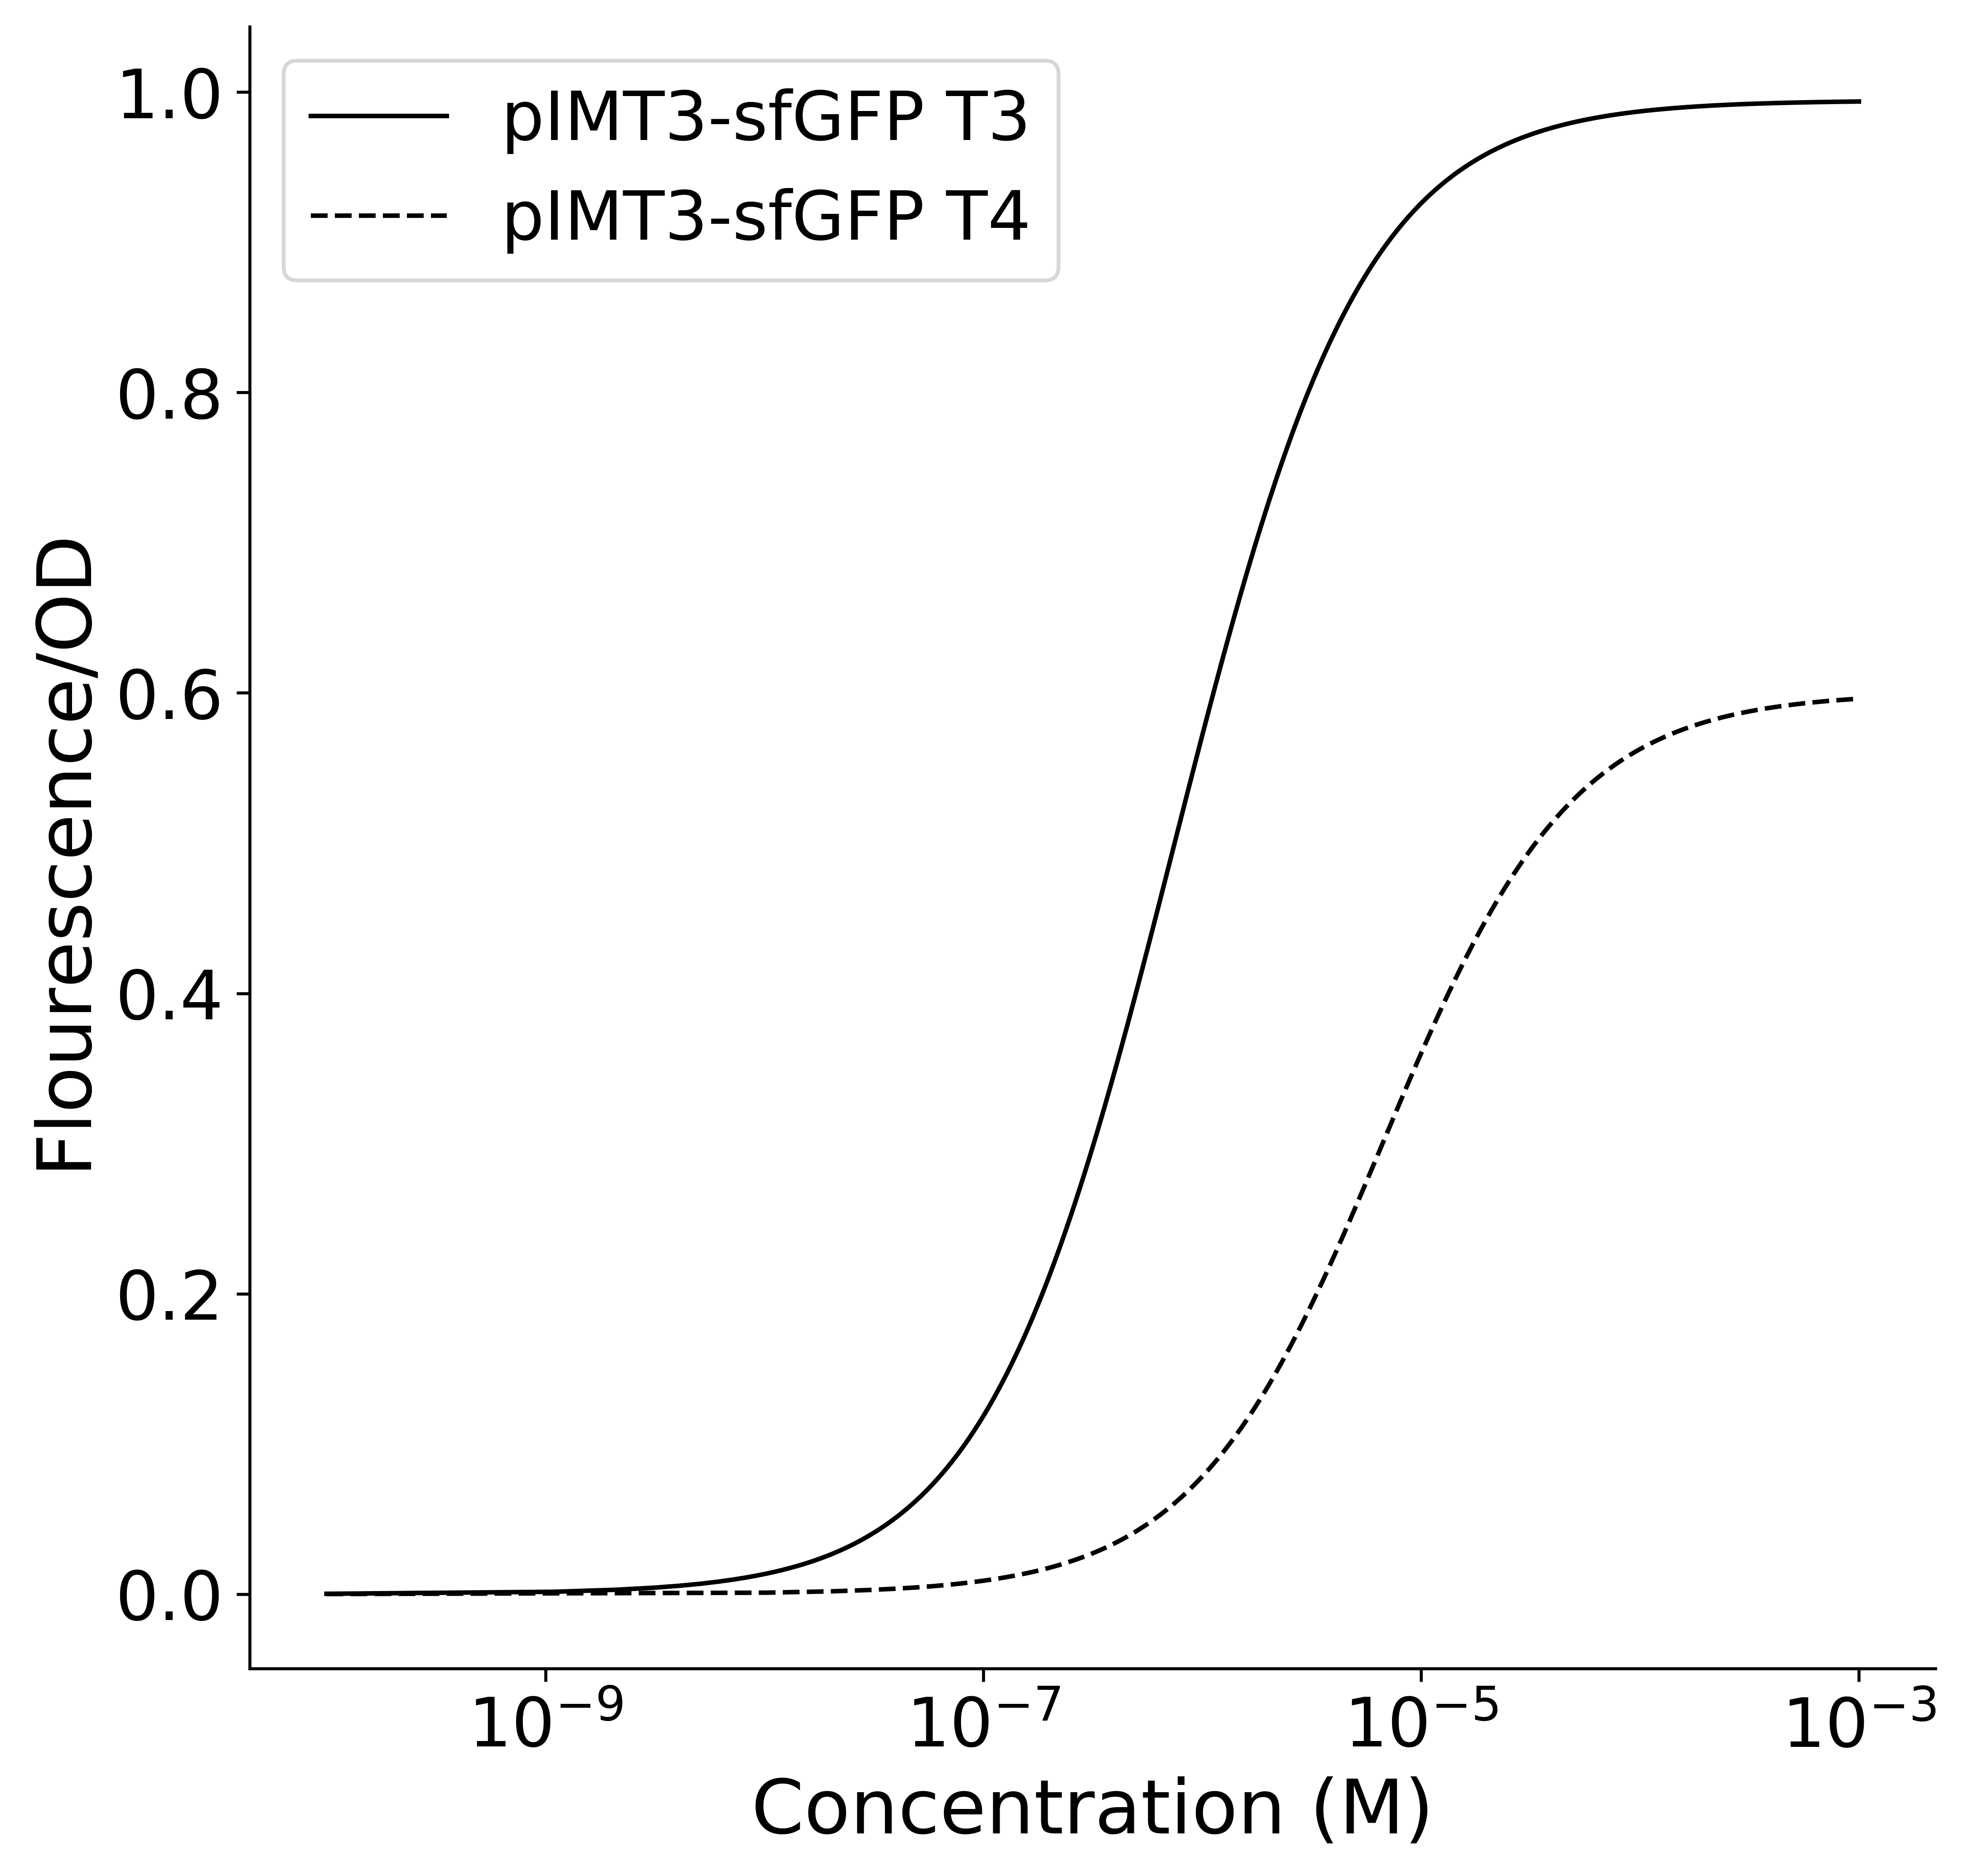

In [14]:
fig,ax=plt.subplots(1,1,figsize=(8, 8), dpi=600)
plt.plot(T3_fit, GFP_fit,color="Black", linestyle='solid', linewidth=1.2, label='pIMT3-sfGFP T3')
plt.plot(T4_fit, GFP_fit2,color="Black", linestyle='dashed' , linewidth=1.2, label='pIMT3-sfGFP T4')

plt.xscale('log')
plt.legend(loc='best',fontsize=20)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
plt.ylabel('Flourescence/OD', fontsize=20)
plt.xlabel('Concentration (M)', fontsize=20)
plt.legend( loc='best', fontsize=18)
plt.savefig('sfGFP_T4_T3', transparent=True)
plt.show()

# OD T3 biosensor

In [32]:
T3_data_OD = [(10**(-8.02)),(10**(-7.02)),(10**(-6.55)),(10**(-6.35)),(10**(-6.16)),(10**(-5.93)),(10**(-5.01)),(10**(-4)),(10**(-3))]
GFP_data_OD = [0,2.33,21.24,43.17,69.22,87.72,99.45,100,100]

In [33]:
def transfer_func2(T3,B,K,n):
    
    GFP_out=B*T3**n/(K**n+T3**n)
    
    return GFP_out

In [34]:
fit, cov = curve_fit(transfer_func2, T3_data_OD, GFP_data_OD)
B_fit3=fit[0]
K_fit3=fit[1]
n_fit3=fit[2]
print(fit)

T3_fit_OD = np.arange((10**-10), 0.001, 0.00000001);
GFP_fit_OD = transfer_func2(T3_fit_OD,B_fit3,K_fit3,n_fit3)


[9.98155509e+01 4.95741606e-07 2.34347877e+00]


C:\Users\quimm\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\quimm\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


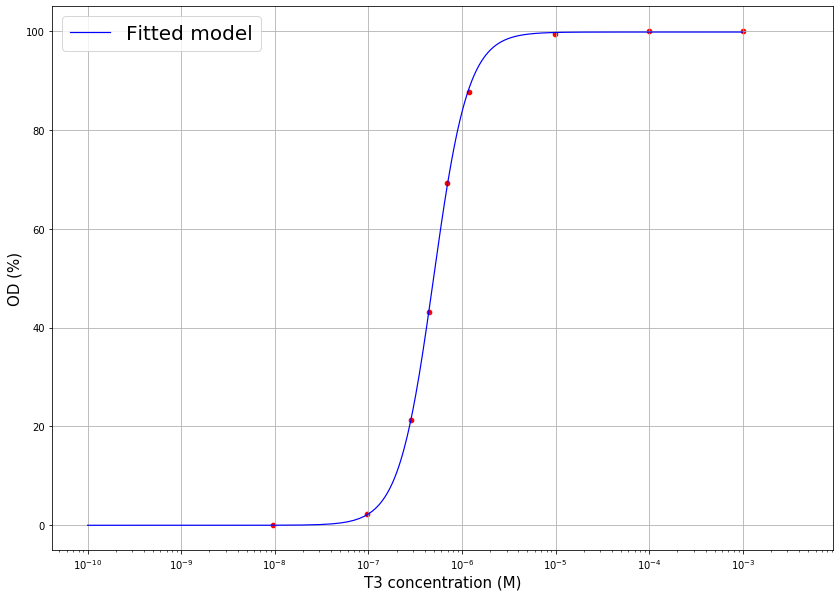

In [35]:
#First we set the figure (plot) size:
plt.rcParams["figure.figsize"] = (14,10)

#AMILCP
#We first plot a point for each value:

plt.scatter(T3_data_OD,GFP_data_OD, s=20, linewidth=1.2, color='r')
#Then we plot the fitted model:
plt.plot(T3_fit_OD, GFP_fit_OD, 'b-', linewidth=1.2, label='Fitted model')

#And we add the axis labels and title:
plt.xscale('log')
plt.legend(loc='best',fontsize=20)
plt.xlabel('T3 concentration (M)', fontsize=15)
plt.ylabel('OD (%)', fontsize=15)

plt.savefig('sfGFP_1LBD_T32', transparent=True)

#Finally we print the plot:
plt.grid()
plt.show()

In [37]:
ss_res=0
for i in range(0,9):
    ss_res=ss_res+(GFP_data_OD[i] - transfer_func2(T3_data_OD[i],B_fit3,K_fit3,n_fit3))**2
ss_tot = np.sum((GFP_data_OD-np.mean(GFP_data_OD))**2)
r_squared = 1 - (ss_res / ss_tot)
print('R-squared='+str(r_squared))

R-squared=0.9998958353281373


In [38]:
Amp=B_fit3
print('Amplitude:'+str(Amp))

T3 = K_fit3
GFP_f = B_fit3/2
Sens=(B_fit3*n_fit3*T3**(n_fit3-1)*(1/K_fit3)**n_fit3/((1+(T3/K_fit3)**n_fit3)**2))*(T3/GFP_f)
print('Sensibility:'+str(Sens))

C_minus=10**(np.log10(K_fit3)-2/(np.log(10)*n_fit3))
C_plus=10**(np.log10(K_fit3)+2/(np.log(10)*n_fit3))
print('Dynamical:'+str(C_minus)+' to '+str(C_plus))

Amplitude:99.81555086367878
Sensibility:1.1717393844663972
Dynamical:2.1116139311764305e-07 to 1.1638478786960741e-06


### pIMT3-sfGFP-2LBD T3 analysis

In [12]:
T3_data3 = [0,0.000000001,0.00000001,0.0000001,0.0000005,0.000001,0.000005,0.00001,0.0001,0.0002]
GFP_data3 = [23.05663246,21.47469812,18.73905224,14.26063673,8.737777855,6.996351865,4.549076648,3.848399664,2.401272722,0]
GFP_error3 = [1.424210301,0.374001861,1.487851914,1.435682962,1.276796022,1.926809348,0.857210683,1.077788185,0.447769599,0.510095941]

In [13]:
def transfer_func3(T3,B,K,n,A):
    
    GFP_out=B/(1+(T3/K)**n)+A
    
    return GFP_out

fit, cov = curve_fit(transfer_func3, T3_data3, GFP_data3, bounds=([0,0,0,0], [10**(6),10**(-5),1,10**(6)] ))
B_fit=fit[0]
K_fit=fit[1]
n_fit=fit[2]
A_fit=fit[3]
print(fit)

T3_fit3 = np.arange((10**-10), 0.001, 0.00000000001);
GFP_fit3 = transfer_func3(T3_fit3, B_fit, K_fit, n_fit,A_fit)

[2.26377583e+01 1.99516700e-07 4.90290188e-01 4.33633142e-01]


In [14]:
ss_res=0
for i in range(0,10):
    ss_res=ss_res+(GFP_data3[i] - transfer_func3(T3_data3[i], B_fit, K_fit, n_fit,A_fit))**2
ss_tot = np.sum((GFP_data3-np.mean(GFP_data3))**2)
r_squared = 1 - (ss_res / ss_tot)
print('R-squared='+str(r_squared))

R-squared=0.9944755062752124


In [15]:
Amp=B_fit
print('Amplitude:'+str(Amp))

GFP_min=A_fit
GFP_max=A_fit+B_fit
print('GFP:'+str(GFP_min)+' to '+str(GFP_max))


T3 = K_fit
GFP_f = B_fit/2+A_fit
Sens=(-B_fit*n_fit*T3**(n_fit-1)*(1/K_fit)**n_fit/((1+(T3/K_fit)**n_fit)**2))*(T3/GFP_f)
print('Sensibility:'+str(Sens))

C_minus=10**(np.log10(K_fit)-2/(np.log(10)*n_fit))
C_plus=10**(np.log10(K_fit)+2/(np.log(10)*n_fit))
print('Dynamical:'+str(C_minus)+' to '+str(C_plus))

Amplitude:22.637758289268533
GFP:0.4336331424541324 to 23.071391431722667
Sensibility:-0.2360999609255903
Dynamical:3.375964580674669e-09 to 1.1791271115307482e-05


In [ ]:
fig,ax=plt.subplots(1,1,figsize=(8, 8), dpi=300)
ax.scatter(T3_data3,GFP_data3, s=20, linewidth=1.2, color="Black",marker='o')
ax.plot(T3_fit3, GFP_fit3, linewidth=1.2, label='Fitted model',color="Black",linestyle='dashed')
plt.errorbar(T3_data3,GFP_data3, GFP_error3, linewidth=1.2, fmt='o', markersize=4, color='black' , ecolor='dimgrey', elinewidth=0.5, capsize=3, barsabove=True, label='Experimental data')
plt.xscale('log')
plt.legend(loc='best',fontsize=20)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
plt.ylabel('Flourescence/OD', fontsize=20)
plt.xlabel('Concentration (M)', fontsize=20)
plt.legend(loc='best', fontsize=18)
plt.savefig('sfGFP_2LBD_T3', transparent=True)
plt.show()

In [26]:
GFP_SNR=[]
GFP=[9907.836923,11835.73493,10705.95879,10937.81634]
GFP_SNR.append(mean(GFP)**2/variance(GFP))
GFP=[10657.67548,10446.29184,10153.5193,10367.65075]
GFP_SNR.append(mean(GFP)**2/variance(GFP))
GFP=[10443.89993,9542.06581,9028.959203,9682.10844,11018.95132,8150.626278]
GFP_SNR.append(mean(GFP)**2/variance(GFP))
GFP=[9060.903542,9162.855312,8809.040578,8360.01008,8488.112204,6502.533949]
GFP_SNR.append(mean(GFP)**2/variance(GFP))
GFP=[6653.960901,6804.497499,7299.514839,7060.245916,7980.081977,5356.798948]
GFP_SNR.append(mean(GFP)**2/variance(GFP))
GFP=[7569.329061,6873.441124,5940.749527,5113.336928]
GFP_SNR.append(mean(GFP)**2/variance(GFP))
GFP=[5023.326313,5384.982532,5738.18328,6207.67197,6538.486657,5263.38869]
GFP_SNR.append(mean(GFP)**2/variance(GFP))
GFP=[6633.010526,5532.772186,4988.216696,5038.042439,5295.66777]
GFP_SNR.append(mean(GFP)**2/variance(GFP))
GFP=[5155.811603,5327.408993,4700.464801,4929.160778,5359.813764]
GFP_SNR.append(mean(GFP)**2/variance(GFP))
GFP=[4240.801232,4126.114286,4576.853878,4275.533567,4909.70848]
GFP_SNR.append(mean(GFP)**2/variance(GFP))
print(GFP_SNR)
print('SNR:'+str(mean(GFP_SNR)))

[186.97335589018806, 2495.546186068519, 90.29520364656663, 73.516836486634, 62.02007447507164, 35.27748151666659, 94.77370601377014, 67.09374144311964, 333.81905771173615, 194.12972105368422]
SNR:363.3445364305956


### pIMT3-sfGFP-2LBD T4 analysis

In [9]:
T4_data4 = [0,(10**-9),(10**-8),(10**-7),5*(10**-7),(10**-6),5*(10**-6),(10**-5),(10**-4),2*(10**-4)]
GFP_data4 = [1.512378455,-0.126718561,2.102143232,0,2.107538742,-0.196771324,1.970376634,0.531154179,-1.975954586,0.326583102]
GFP_error4 = [0.409716284,0.30471507,0.605868237,0.45816876,0.415603938,0.986223823,0.539545801,0.401112313,1.315728444,0.603472917]

In [10]:
fit, cov = curve_fit(transfer_func3, T4_data4, GFP_data4, bounds=([0,0,0,0], [10**(6),10**(-5),1,10**(6)] ))
B_fit2=fit[0]
K_fit2=fit[1]
n_fit2=fit[2]
A_fit2=fit[3]
print(fit)

T4_fit4 = np.arange((10**-10), 0.001, 0.0000000001);
GFP_fit4 = transfer_func3(T4_fit4, B_fit2, K_fit2, n_fit2, A_fit2)

[9.01080885e-01 1.90129368e-11 9.99947288e-01 6.58489819e-01]


In [29]:
ss_res=0
for i in range(0,10):
    ss_res=ss_res+(GFP_data4[i] - transfer_func3(T4_data4[i], B_fit2, K_fit2, n_fit2, A_fit2))**2
ss_tot = np.sum((GFP_data4-np.mean(GFP_data4))**2)
r_squared = 1 - (ss_res / ss_tot)
print('R-squared='+str(r_squared))

R-squared=0.04484650293154491


In [30]:
Amp=B_fit2
print('Amplitude:'+str(Amp))

GFP_min=A_fit2
GFP_max=A_fit2+B_fit2
print('GFP:'+str(GFP_min)+' to '+str(GFP_max))


#GFP_f=(alpha_p_fit*beta_primo_fit+2*alpha_GFP_fit*beta_fit)/(2*delta_GFP_fit*beta_fit)
#T4=delta_p_fit/beta_fit
#Sens=alpha_p_fit*delta_p_fit*beta_primo_fit/(delta_GFP_fit*(delta_p_fit+T4*beta_fit)**2)*(T4/GFP_f)
#print('Sensibility:'+str(Sens))

C_minus=10**(np.log10(K_fit2)-2/(np.log(10)*n_fit2))
C_plus=10**(np.log10(K_fit2)+2/(np.log(10)*n_fit2))
print('Dynamical:'+str(C_minus)+' to '+str(C_plus))

Amplitude:0.90108088497735
GFP:0.65848981864925 to 1.5595707036266
Dynamical:2.572849920789802e-12 to 1.4050246908266637e-10


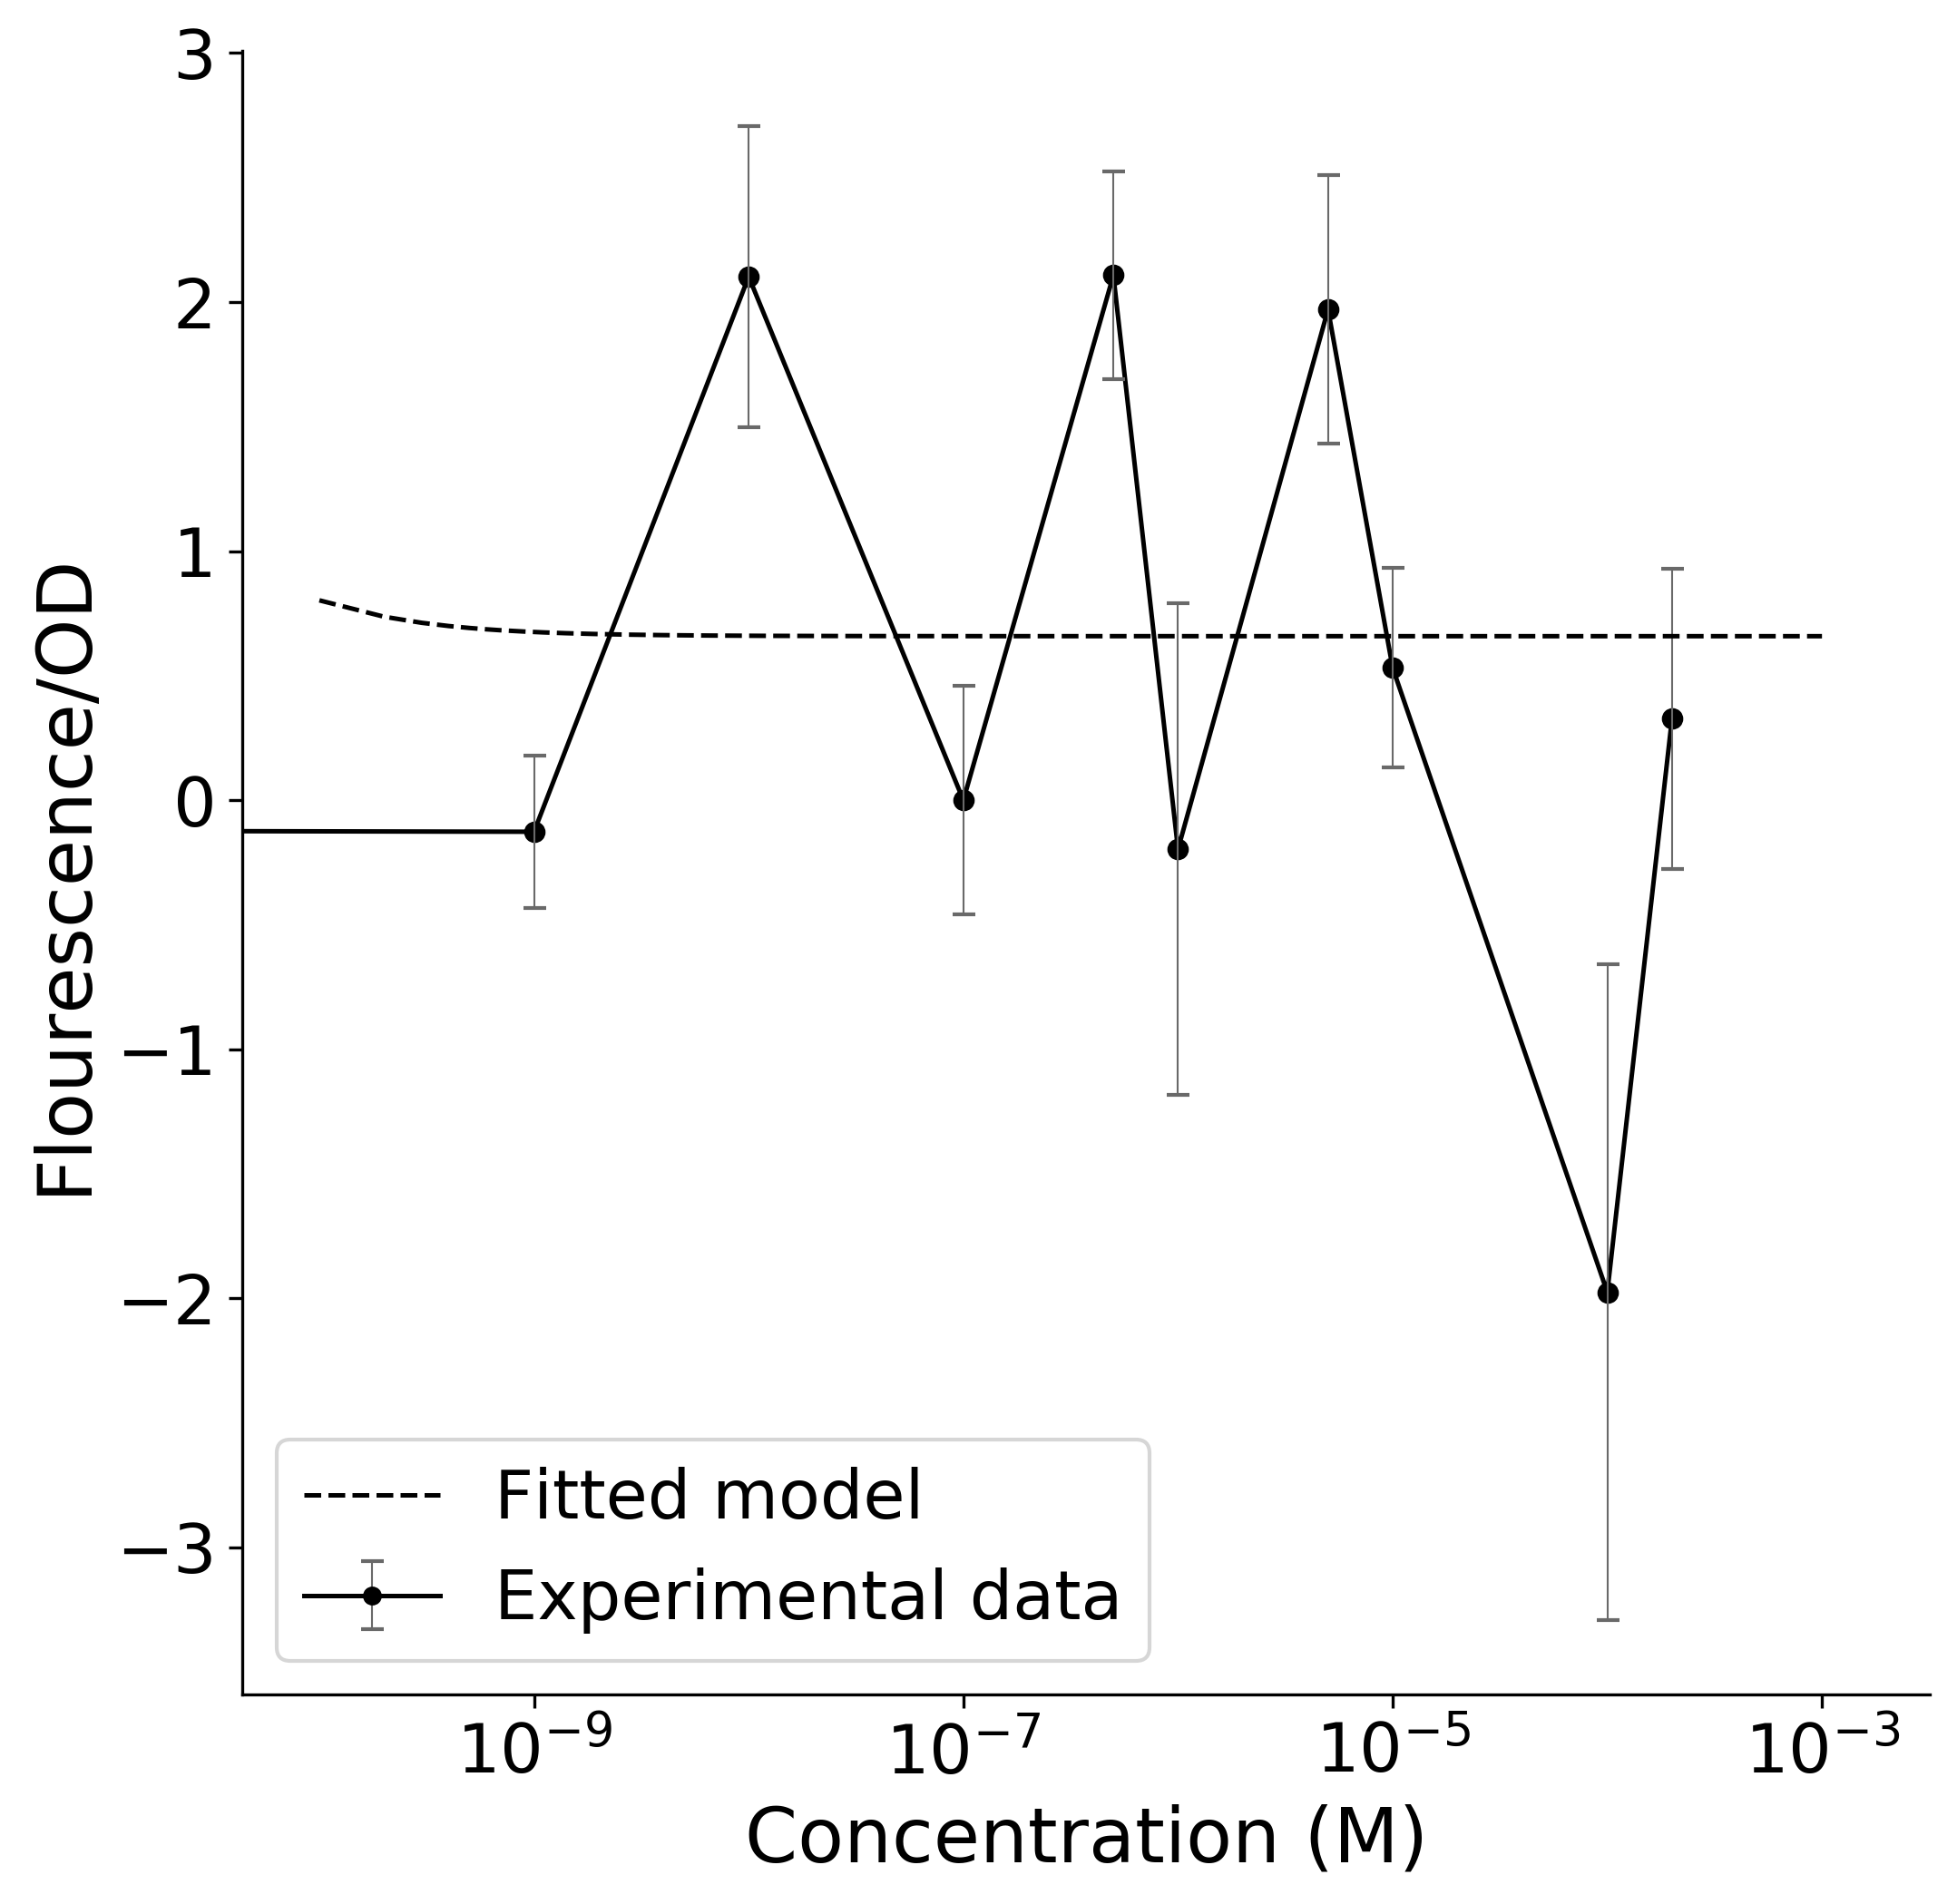

In [31]:
fig,ax=plt.subplots(1,1,figsize=(8, 8), dpi=300)
ax.scatter(T4_data4,GFP_data4, s=20, linewidth=1.2, color="Black",marker='o')
ax.plot(T4_fit4, GFP_fit4, linewidth=1.2, label='Fitted model',color="Black",linestyle='dashed')
plt.errorbar(T4_data4,GFP_data4, GFP_error4, linewidth=1.2, fmt='o-', markersize=4, color='black' , ecolor='dimgrey', elinewidth=0.5, capsize=3, barsabove=True, label='Experimental data')
plt.xscale('log')
plt.legend(loc='best',fontsize=20)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
plt.ylabel('Flourescence/OD', fontsize=20)
plt.xlabel('Concentration (M)', fontsize=20)
plt.legend(loc='best', fontsize=18)
plt.savefig('sfGFP_2LBD_T4', transparent=True)
plt.show()

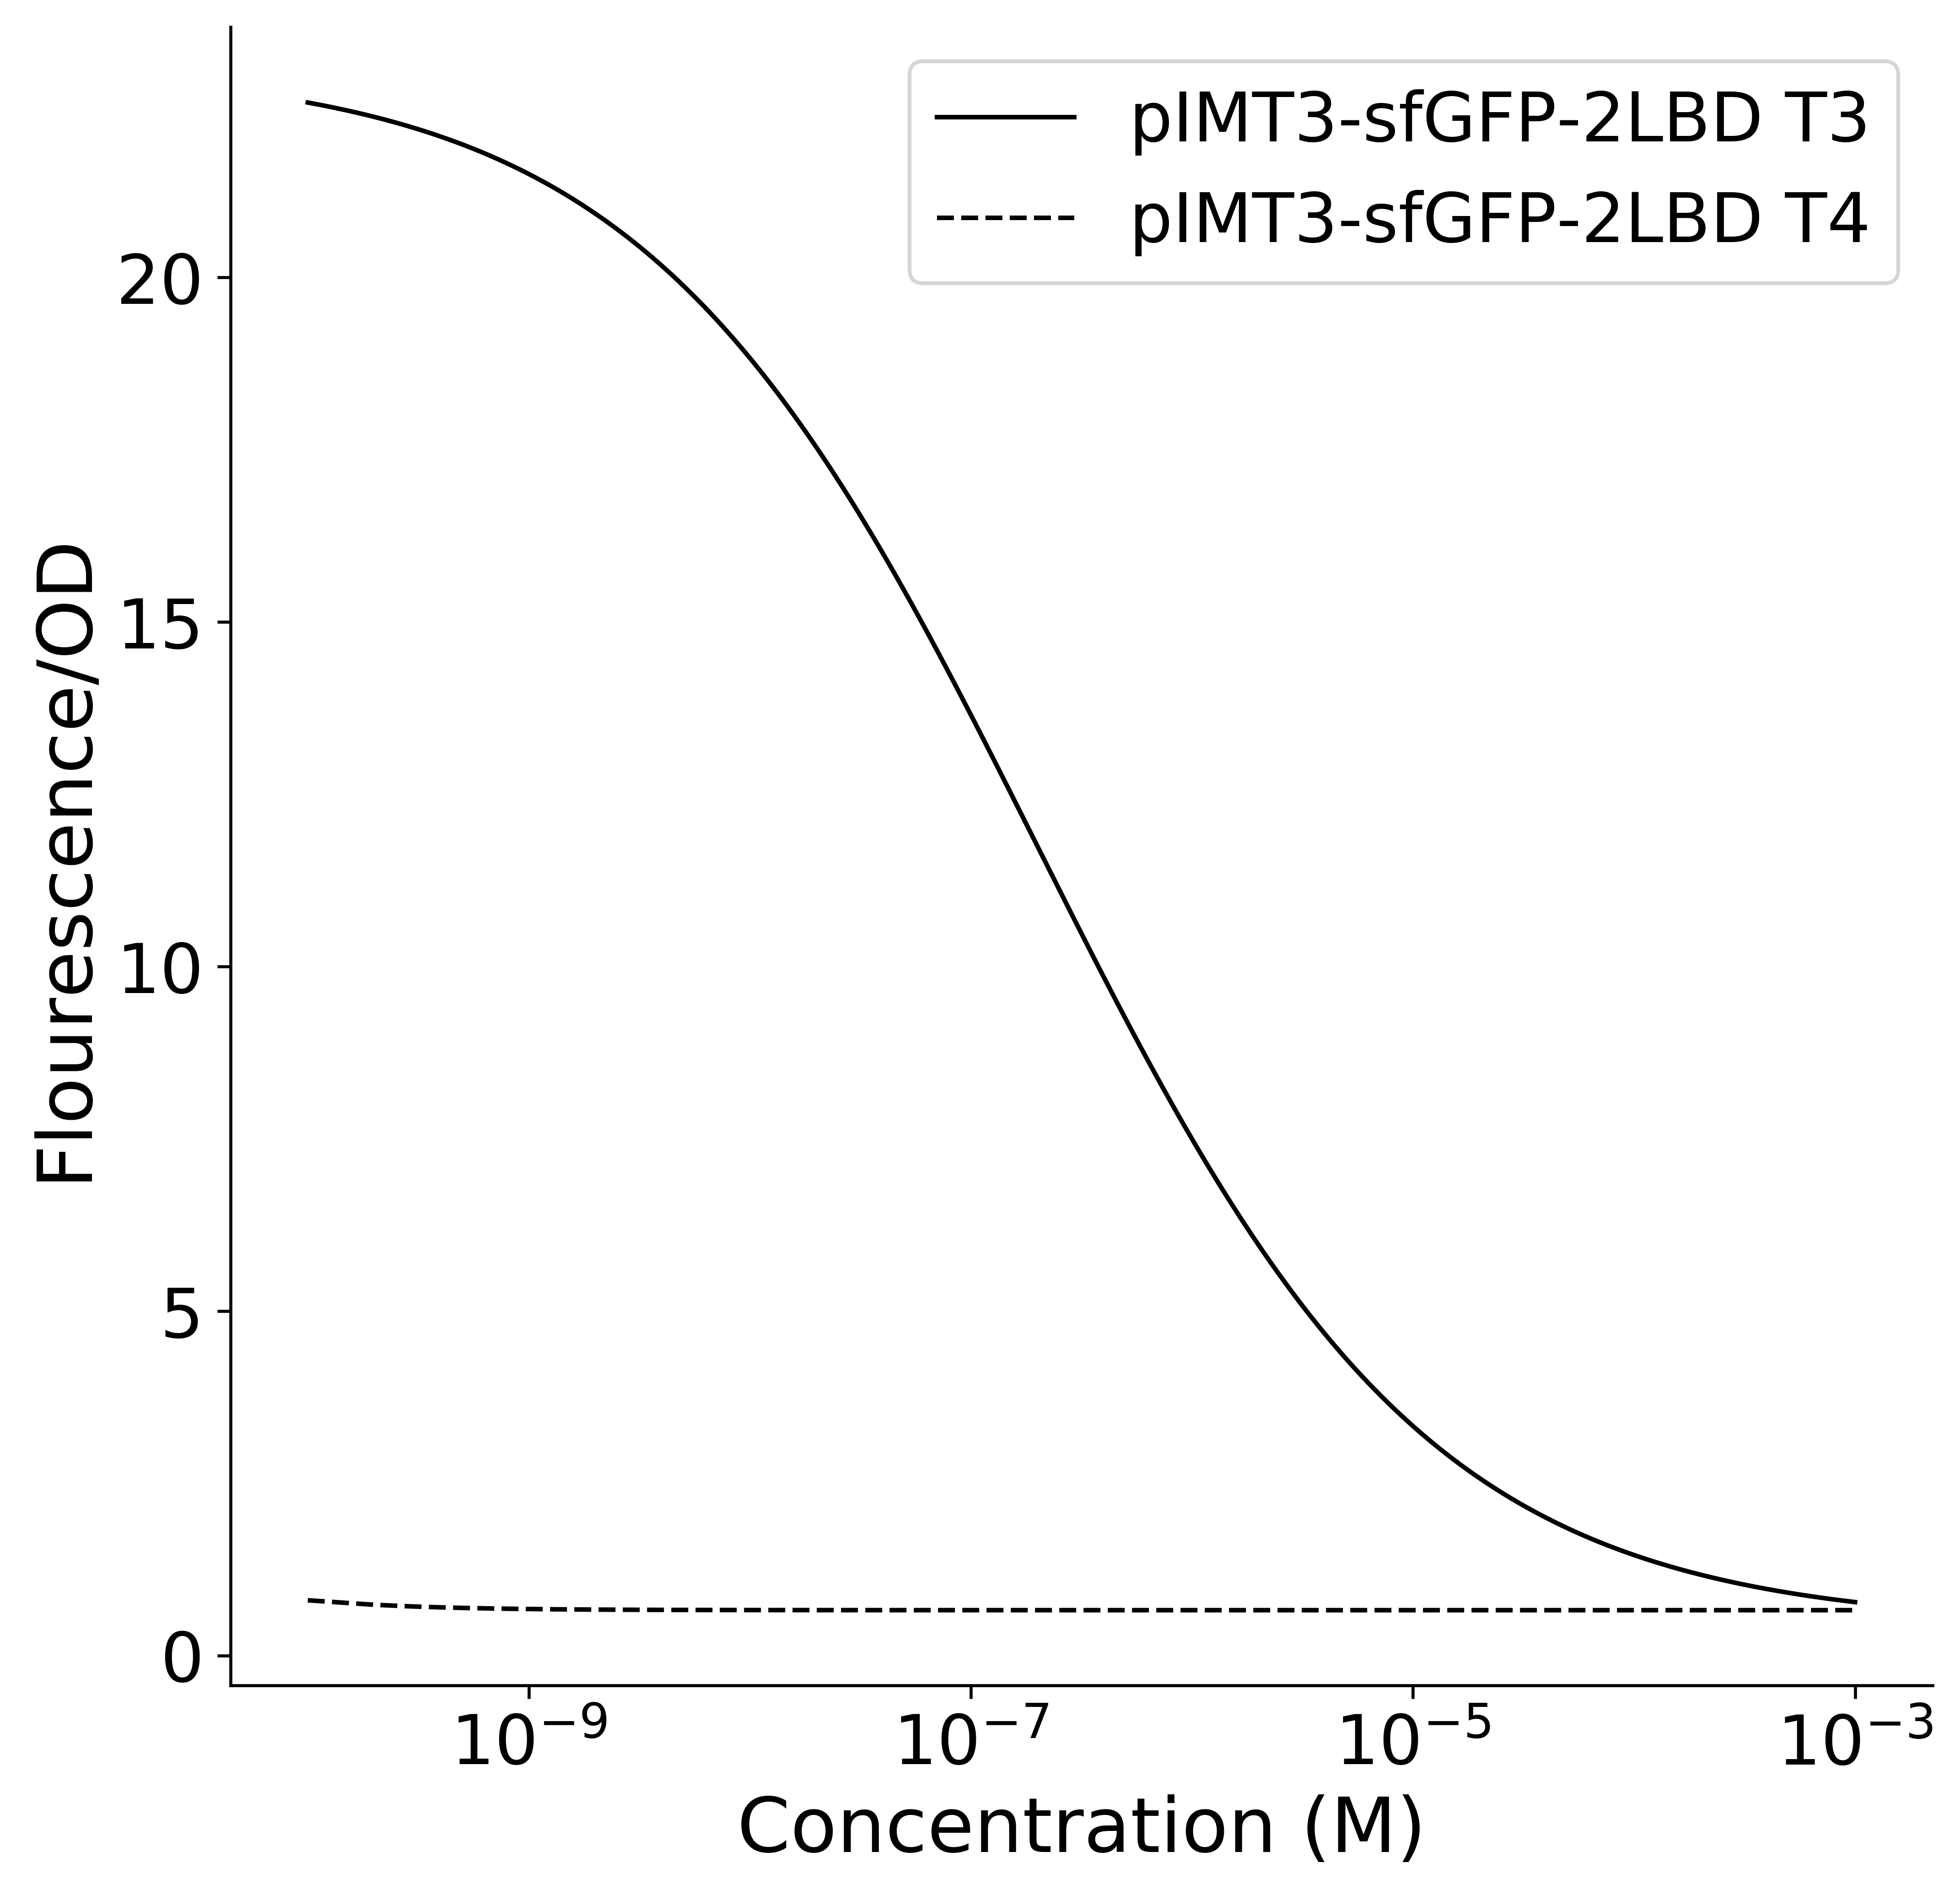

In [32]:
fig,ax=plt.subplots(1,1,figsize=(8, 8), dpi=600)
plt.plot(T3_fit3, GFP_fit3,color="Black", linestyle='solid', linewidth=1.2, label='pIMT3-sfGFP-2LBD T3')
plt.plot(T4_fit4, GFP_fit4,color="Black", linestyle='dashed', linewidth=1.2, label='pIMT3-sfGFP-2LBD T4')
plt.xscale('log')
plt.legend(loc='best',fontsize=20)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
plt.ylabel('Flourescence/OD', fontsize=20)
plt.xlabel('Concentration (M)', fontsize=20)
plt.legend( loc='best', fontsize=18)
plt.savefig('sfGFP_2LBD_T4_T3', transparent=True)
plt.show()

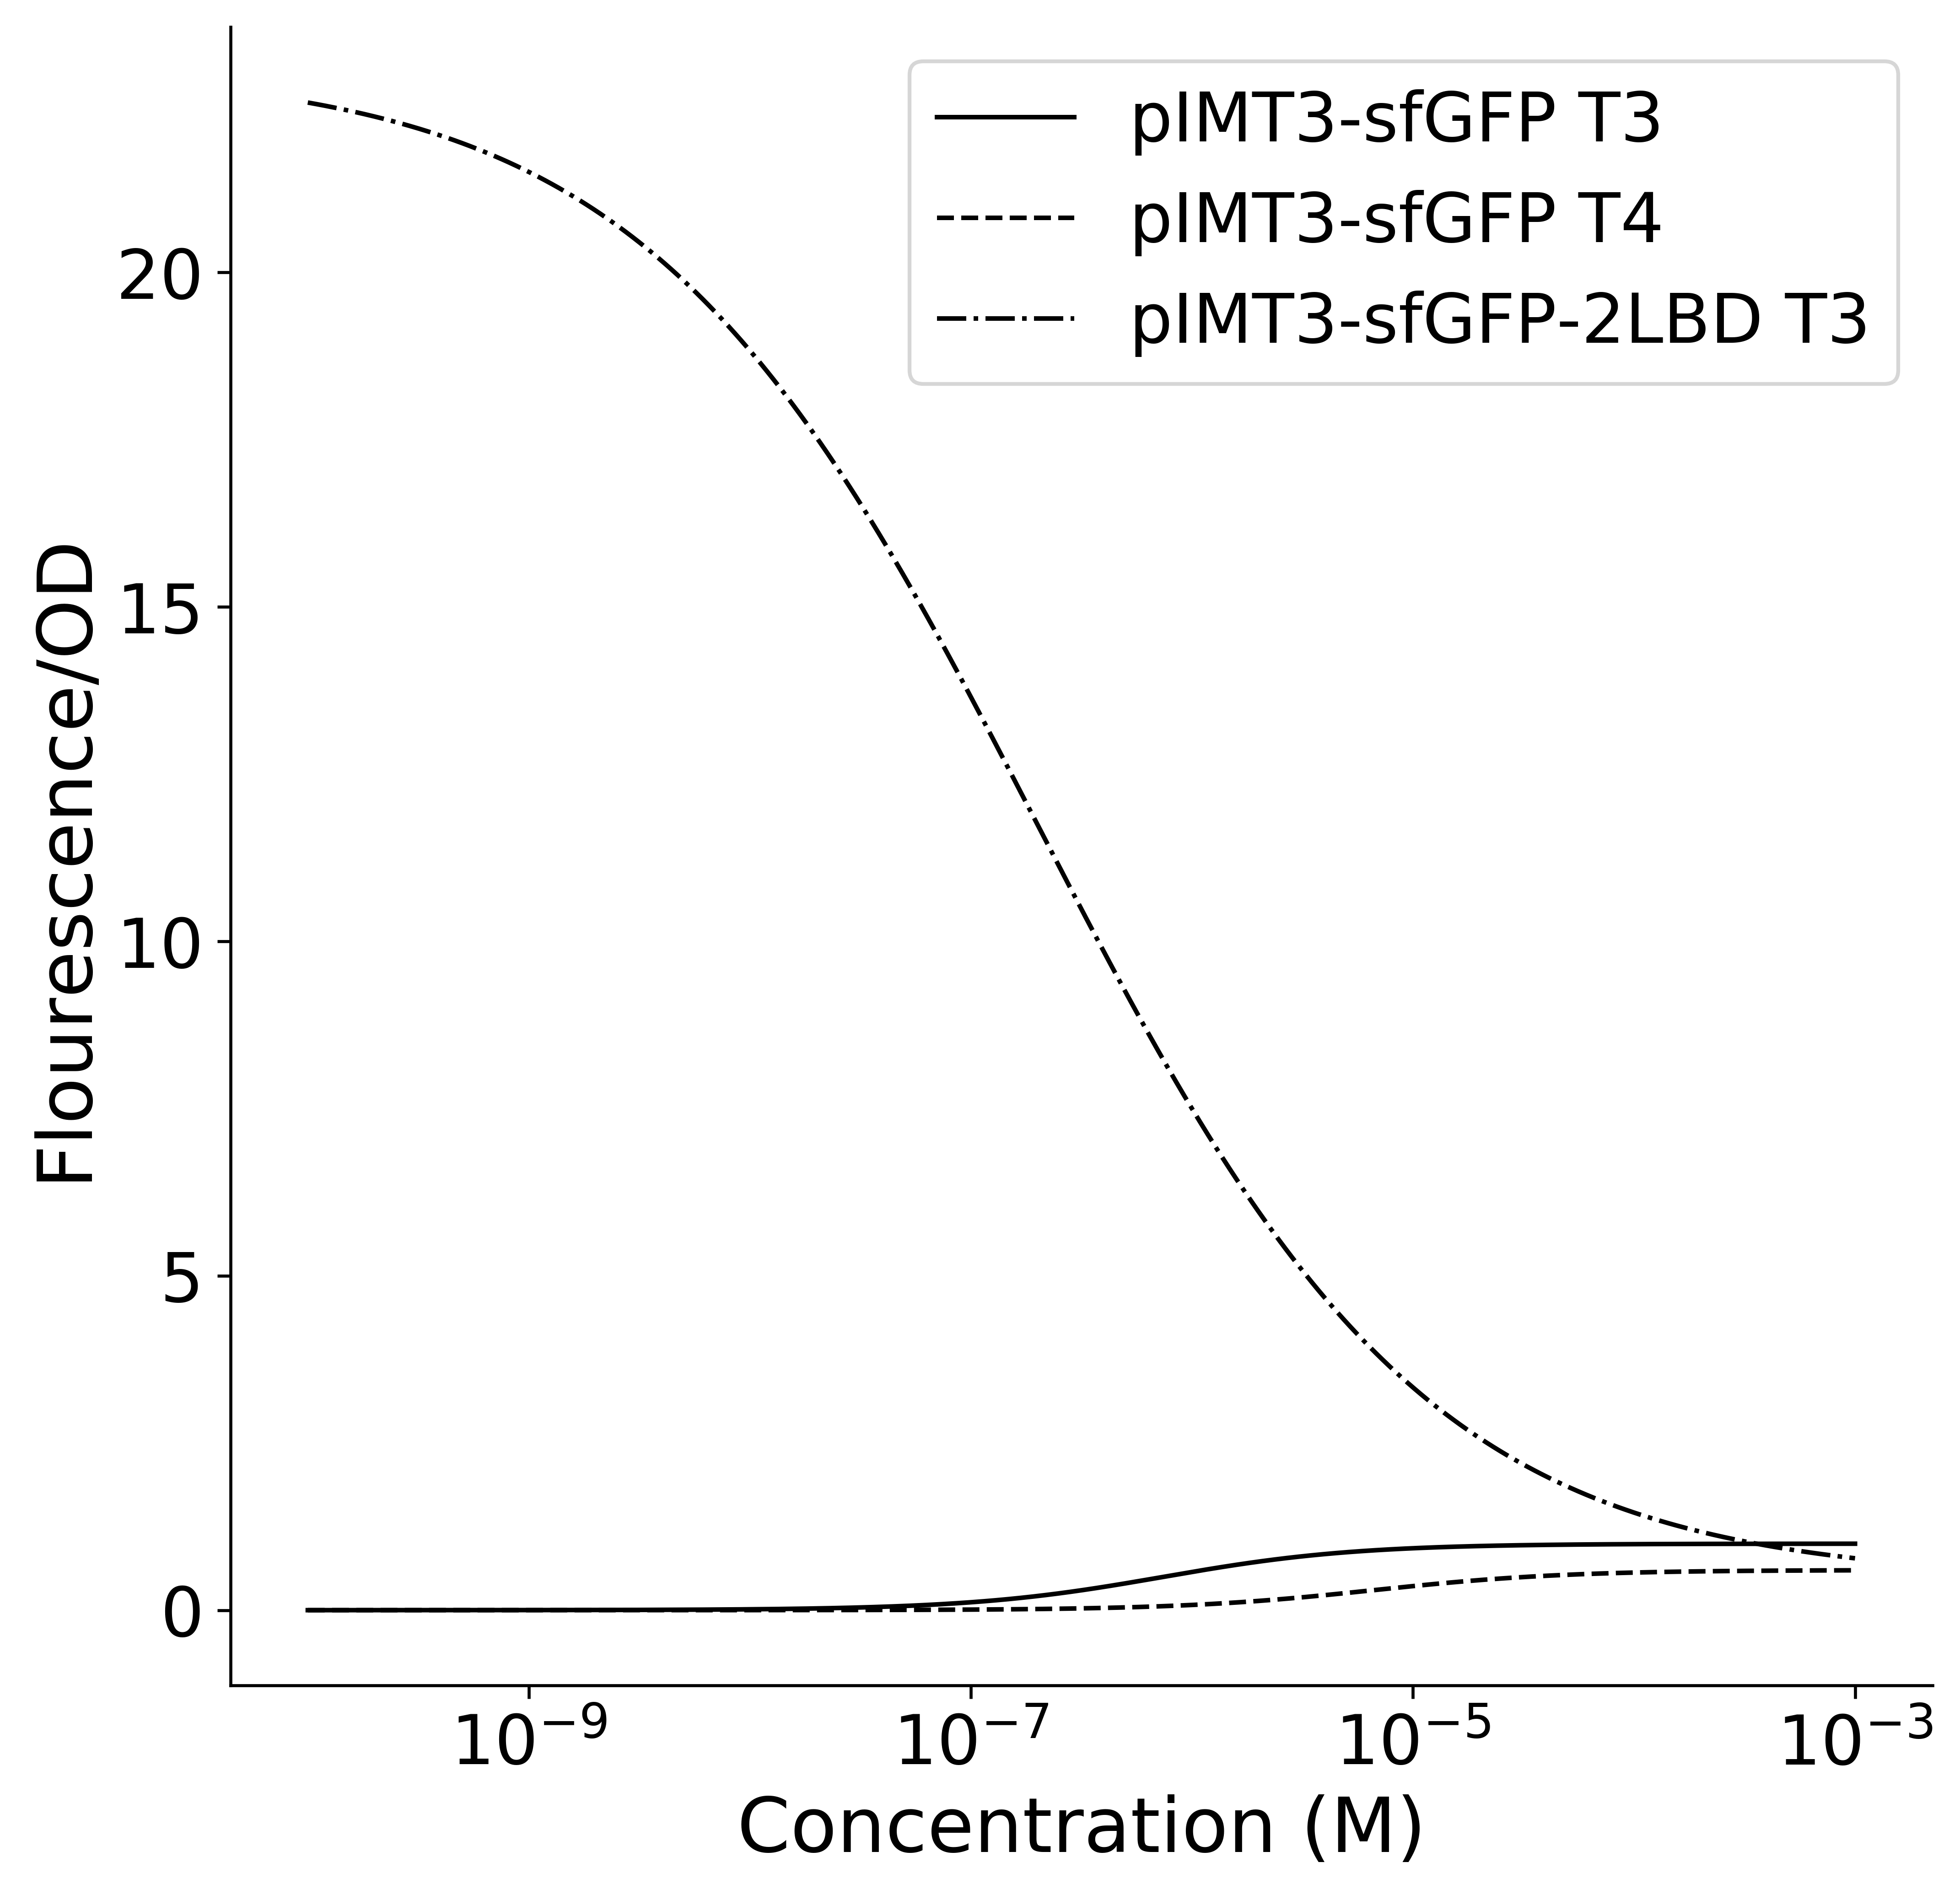

In [12]:
fig,ax=plt.subplots(1,1,figsize=(8, 8), dpi=600)
plt.plot(T3_fit, GFP_fit,color="Black", linestyle='solid', linewidth=1.2, label='pIMT3-sfGFP T3')
plt.plot(T4_fit, GFP_fit2,color="Black", linestyle='dashed' , linewidth=1.2, label='pIMT3-sfGFP T4')
plt.plot(T3_fit3, GFP_fit3,color="Black", linestyle='dashdot', linewidth=1.2, label='pIMT3-sfGFP-2LBD T3')
plt.xscale('log')
plt.legend(loc='best',fontsize=20)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
plt.ylabel('Flourescence/OD', fontsize=20)
plt.xlabel('Concentration (M)', fontsize=20)
plt.legend( loc='best', fontsize=18)
plt.savefig('sfGFP_T4_T3_all', transparent=True)
plt.show()

### pIMT3-sfGFP-2LBD T3 analysis with time

In [5]:
data=pd.read_csv("2LBD_time.csv")


,time,0M,1nM,10nM,100nM,500nM,1uM,5uM,10uM,100uM,200uM
0,0.0,2737.624483,1338.196554,2729.883163,1353.566339,2614.714665,2587.896282,2697.264347,2580.627218,1077.277892,794.594773
1,1201.1,2376.293894,1264.536274,2378.844882,1309.132018,2281.628070,2233.552664,2359.483187,2287.352055,1028.792203,819.507984
2,2401.1,2097.433922,1220.384897,2104.630383,1251.756442,2034.398005,1984.788409,2108.575190,1990.948834,1006.327042,841.109352
3,3601.3,1955.834805,1233.497324,1949.816673,1267.145013,1899.756894,1844.842206,1963.974040,1857.835286,1018.013004,884.215223
4,4801.4,1894.695976,1285.111306,1858.843758,1319.735358,1818.619051,1737.176394,1903.694277,1813.590827,1104.740410,944.053184
...,...,...,...,...,...,...,...,...,...,...,...
86,103212.5,10570.362910,10117.562890,9866.798114,8800.156082,7123.031857,6458.211270,5725.051244,5517.336398,4866.353928,4387.551901
87,104412.7,10653.227180,10179.179700,9801.682034,8742.631406,7074.980922,6423.225315,5700.505393,5512.331615,5170.655215,4372.009160
88,105612.8,10760.437920,10251.722630,9745.795988,8740.405171,7045.009092,6439.142065,5697.194467,5527.023257,5212.590095,4415.199868
89,106813.0,10754.508940,10279.786710,9670.722519,8704.988315,6940.229552,6412.111384,5726.067856,5530.996582,5058.090180,4421.354072


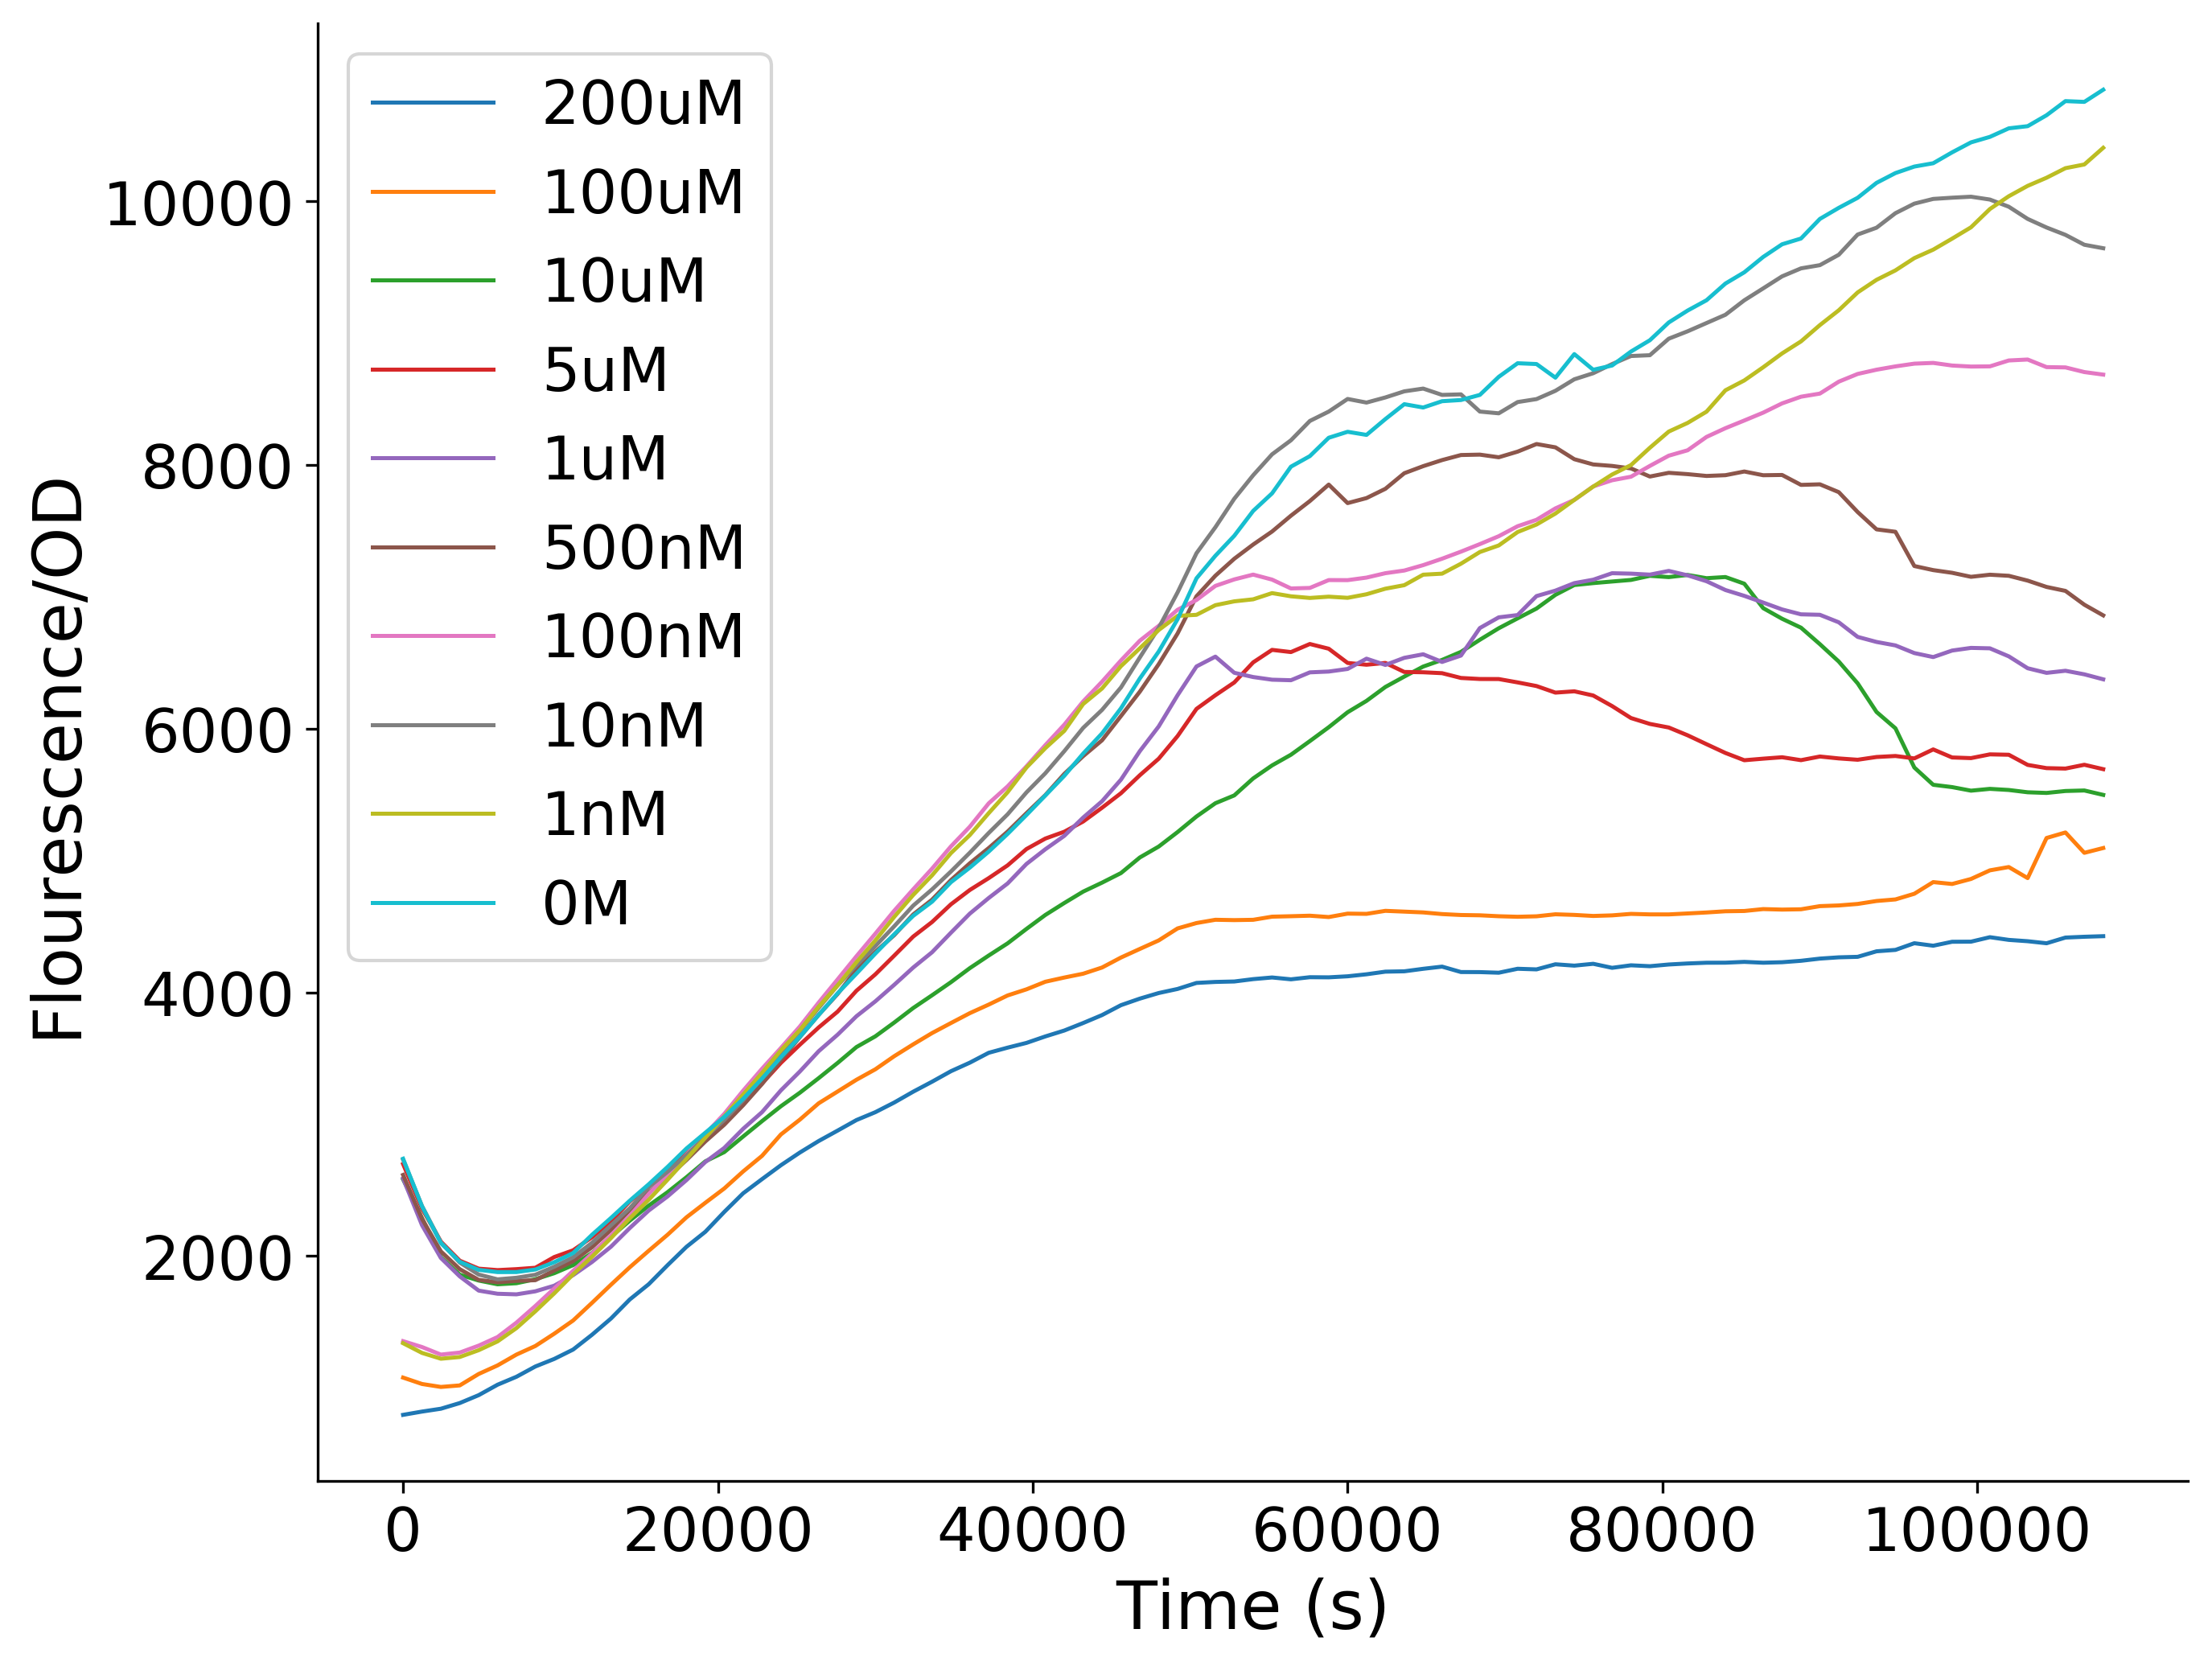

In [10]:
fig,ax=plt.subplots(1,1,figsize=(10, 8), dpi=300)
ax.plot(data["time"], data["200uM"], linewidth=1.2, label='200uM')
ax.plot(data["time"], data["100uM"], linewidth=1.2, label='100uM')
ax.plot(data["time"], data["10uM"], linewidth=1.2, label='10uM')
ax.plot(data["time"], data["5uM"], linewidth=1.2, label='5uM')
ax.plot(data["time"], data["1uM"], linewidth=1.2, label='1uM')
ax.plot(data["time"], data["500nM"], linewidth=1.2, label='500nM')
ax.plot(data["time"], data["100nM"], linewidth=1.2, label='100nM')
ax.plot(data["time"], data["10nM"], linewidth=1.2, label='10nM')
ax.plot(data["time"], data["1nM"], linewidth=1.2, label='1nM')
ax.plot(data["time"], data["0M"], linewidth=1.2, label='0M')
plt.legend(loc='best',fontsize=20)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
plt.ylabel('Flourescence/OD', fontsize=20)
plt.xlabel('Time (s)', fontsize=20)
plt.legend(loc='best', fontsize=18)
plt.savefig('sfGFP_2LBD_time', transparent=True)
plt.show()